In [2]:
# Reproduction of the simulation presented in "Wealth redistribution in our small world" (Iglesias et al., 2003, Physica A).

# Graph theory library
# https://igraph.org/r/
library(igraph)

# A consistent, simple and easy to use set of wrappers around the fantastic 'stringi' package
# https://www.rdocumentation.org/packages/stringr/versions/1.4.0
library(stringr)

# Provides the nlsLM function, which works better than nls
# https://cran.r-project.org/web/packages/minpack.lm/index.html
library(minpack.lm)



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [5]:
wlc_analysis <- function(x_str, y_str, aa0, x0, dx0, lowerlimits, upperlimits)
{

erf <- function(x) 2 * pnorm(x * sqrt(2)) - 1

x = as.numeric(unlist(str_extract_all(x_str, "[\\.0-9e-]+")))
y = as.numeric(unlist(str_extract_all(y_str, "[\\.0-9e-]+")))
    
cat("\n")
cat("\n In wlc_analysis:")
cat("\n x = ",x)
cat("\n y = ",y)
    
plot(x,y,type="h",xlim=c(0,1))

hdataframe = data.frame(x = x, y = y)

# Estimate some starting values:

aa.0 = aa0
dx.0 = dx0
x0.0 = x0

cat("\n")
cat("\n Initial parameters for curve fitting:")
cat("\n aa = ",aa.0,"\n dx = ",dx.0,"\n x0 = ",x0.0)

# Plot initial fit:
xfit.0 = seq(from=0.0, to=1.0, length.out=100)
yfit.0 = aa.0 * dlnorm((xfit.0-x0.0)/dx.0)
    
lines(xfit.0, yfit.0, col="green", lwd=3)

# Define limits:
    
lowerlimits = c(0.01*aa.0, 0.01*dx.0, 0.01*x0.0)
upperlimits = c(20.0*aa.0, 10.0*dx.0, 10.0*x0.0)
    
# Do the fit:

#try
#(

    fit <- nlsLM( y ~ aa * dlnorm((x-x0)/dx), data = hdataframe,
             start = list(aa = aa.0, dx = dx.0, x0 = x0.0),
             lower = lowerlimits,
             upper = upperlimits,
             alg = "plinear")
        
    xfit.1 = xfit.0
    yfit.1 = predict(fit, data.frame(x=xfit.0, y=yfit.0))
    
    cat("\n Still in wlc_analysis:")
    cat("\n xfit.1 = ",xfit.1)
    cat("\n yfit.1 = ",yfit.1)    
    
    lines(xfit.1, yfit.1, col="blue", lwd=2)

    flush.console()

    aa = coef(fit)[[1]]
    dx = coef(fit)[[2]]
    x0 = coef(fit)[[3]]

    cat("\n")
    cat("\n Final adjusted parameters:")
    cat("\n aa = ",aa,"\n x0 = ",x0,"\n dx = ",dx)
    cat("\n")

#)

par(mar=c(5,6,4,1)+.1) # margins

plot(x, y, type="h", col="#00AAFF", lend=1, xlim=c(0,1), lwd=20, xlab="Wealth", ylab="Number of agents", cex=5, cex.lab=2, cex.axis=2)

f_sol = function(x) ( aa * dlnorm((x-x0)/dx) )  # divided by y_sum to normalize number of agents to 1
curve(f_sol, 0, 1, type="l", col="black", lwd=5, add=TRUE)


flush.console()
}

 Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.9
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 2


 Agent wealth histogram:

 Histogram data frame:

 x =  0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1
 y =  297 110 42 14 5 9 7 7 2 2 0 3 0 0 2

 In wlc_analysis:
 x =  0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1
 y =  297 110 42 14 5 9 7 7 2 2 0 3 0 0 2

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.4343434 0.4444444 0.4545455 0.4646465 0.4747475 0.4848485 0.4949495 0.5050505 0.5151515 0.5252525 0.5353535 0.5454545 0.5555556 0.5656566 0.5757576 0.5858586 0.5959596 0.

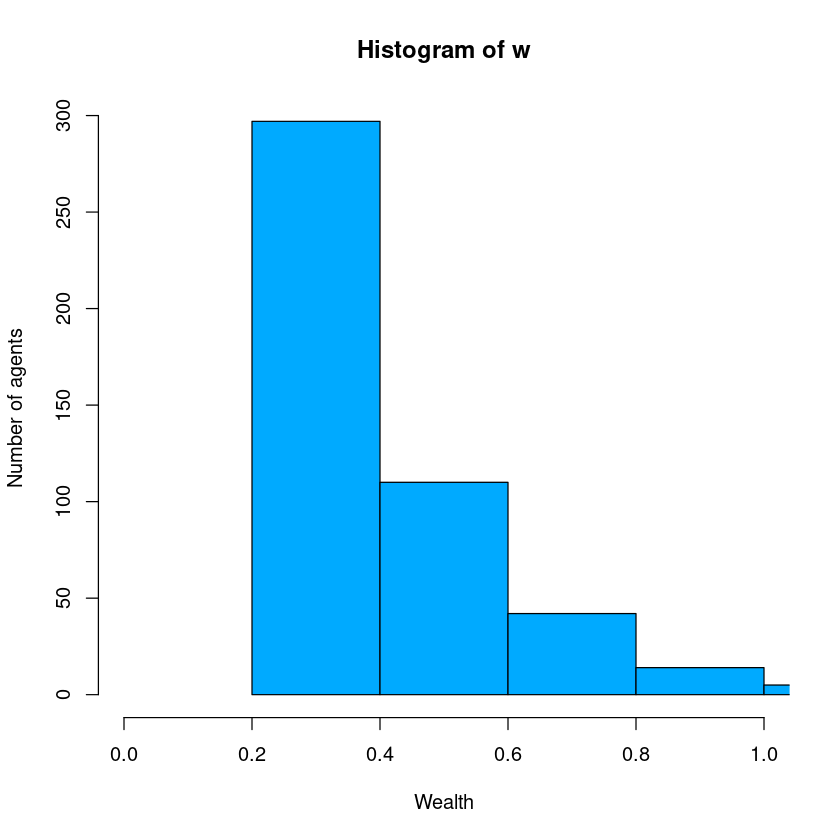



 Final adjusted parameters:
 aa =  459.726 
 x0 =  0.2500998 
 dx =  0.1639543


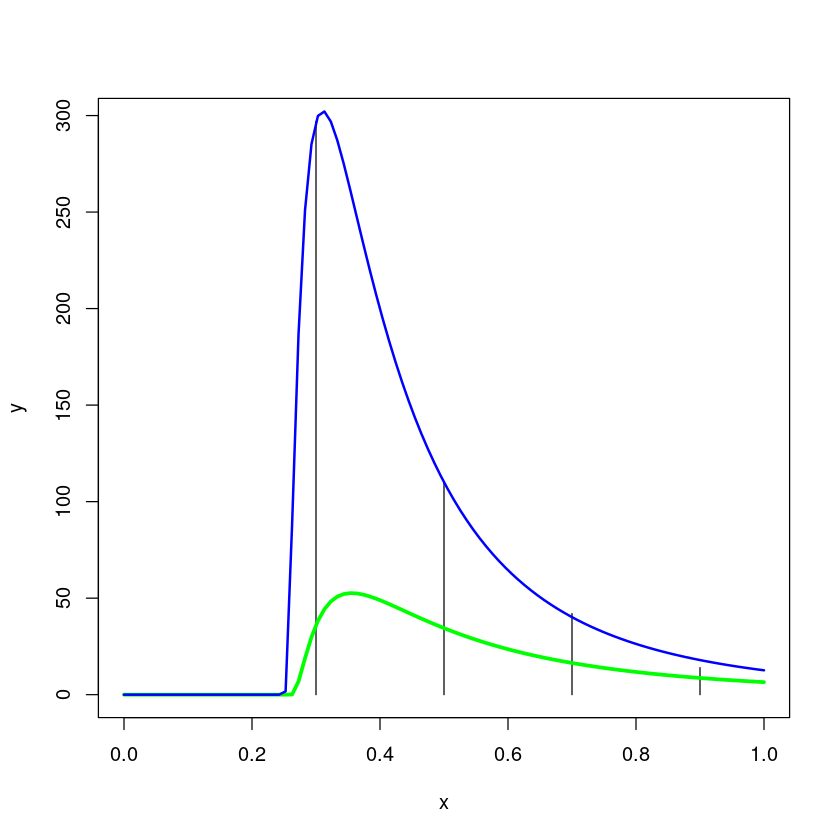

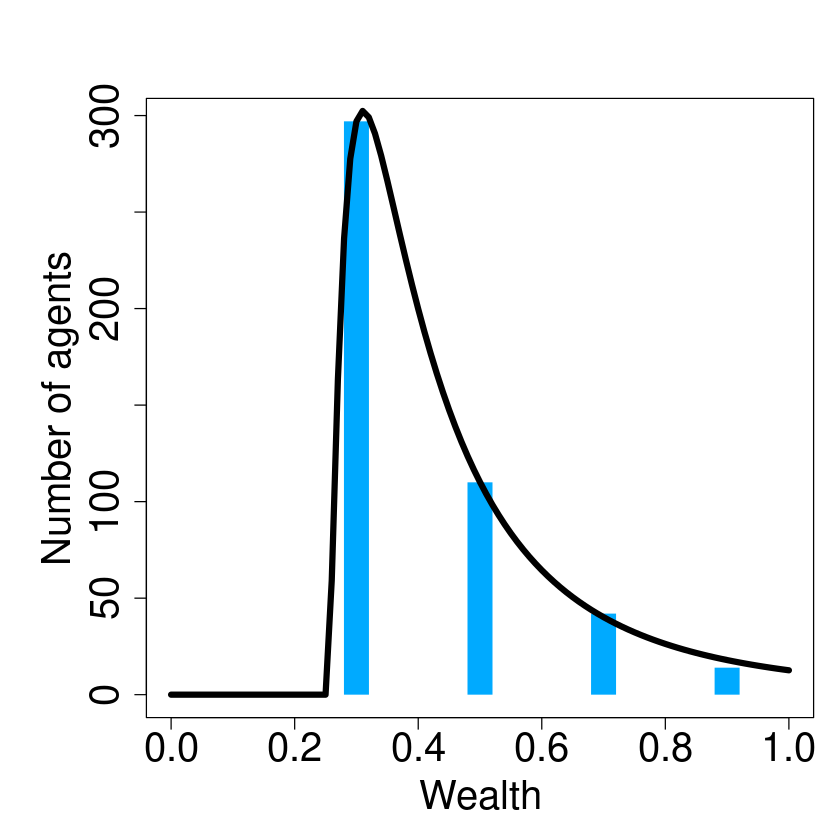

In [18]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.2431461 0.3587451 0.5601446 0.3337747 0.3591337 0.5270619 3.117648 1.928565 0.2708505 0.3945128 1.464261 0.3612512 0.3451484 0.3765244 0.3890784 0.2941202 0.3561399 0.4664176 0.397941 0.3836849 0.3425614 0.2750255 0.2970792 0.4837711 0.8569607 0.3924271 0.3313333 0.7071915 0.3665931 0.7456907 0.325621 0.8454671 0.3395207 0.2831843 0.3566368 0.2995497 1.331818 0.3773168 0.8547914 0.5330442 0.3777614 0.4348091 0.244252 0.3805182 1.693608 0.3176305 0.4322419 0.5731306 0.3859602 0.47027 0.3709722 0.7405418 0.3327545 1.314341 0.3740981 0.3349594 0.9917412 0.3002789 0.3349208 0.4241591 0.7522659 0.7162717 0.3173178 0.5249252 0.3488116 0.3716954 0.2895468 0.3363332 0.2651772 0.2480748 0.2258996 0.34093 0.3394458 0.3557811 0.7150268 0.3348102 0.3687284 0.4957397 0.3356786 0.518369 0.3634522 0.3787033 0.8781639 0.2986559 0.589777 0.3541044 0.8760033 0.3468141 0.4212086 0.3346725 0.4571837 0.6339397 0.3408814 0.396889 0.4376983 0.343211 0.4373579 0.3573085 0.2767783 0.3183805 0.4604895 0.3181326 1.248025 0.5339698 2.044216 0.3464956 0.6129358 0.3653355 0.311272 0.3181118 0.324218 0.4565117 0.6509849 0.3863729 0.4244842 0.4213615 0.3523607 0.3153903 0.4050788 0.3548336 0.3755871 0.3419006 0.4086158 0.4889861 1.055646 0.9475394 3.124091 0.5594342 0.4363363 0.2935631 0.5741668 1.215254 0.3100168 0.3492067 0.3895638 0.3060756 0.3126597 1.709202 0.3464188 0.3434539 0.3424857 0.4071902 0.3214133 0.3766507 1.650168 1.350478 0.40056 0.4052938 0.3526828 0.3978156 0.3649414 0.2608831 0.4638053 0.463896 0.3376768 0.5733483 0.6338541 0.4289495 0.3209397 0.3739117 0.3185577 0.3488929 0.379665 0.3255986 0.3947378 0.439493 0.7282993 0.7119573 0.2961885 0.3128407 0.7096451 0.389269 0.4223565 1.295793 1.095009 0.3403742 0.3684602 0.4796586 0.4754647 0.2429267 0.2986409 0.3148033 0.3818188 0.3934741 0.3001756 0.327303 0.3580274 0.3653721 0.3366906 0.3510973 0.2568458 0.3338779 0.7756557 0.3442717 0.4571403 0.4629789 0.3422977 0.3716571 0.4565707 1.250281 0.3753177 0.3259358 0.3114916 0.3490901 0.4354065 0.3558121 0.2640619 0.2659642 0.3433406 0.3790059 0.3933668 0.4040498 0.3071601 0.4579052 0.3094212 0.3814234 0.4545187 0.353289 0.3020906 2.40218 0.3513835 0.8440388 0.6207777 0.31811 0.399095 0.2326729 0.3484448 0.2901834 0.3126429 0.4443539 0.6015776 0.5013673 0.722229 0.5850754 0.3687144 2.448529 0.335777 0.7683929 0.3237194 0.3410442 0.3250894 1.240311 1.115045 0.3168089 0.388214 0.3955216 0.3030817 0.3361208 0.3223065 0.3460526 0.4185086 0.3660083 0.3516972 1.664314 0.3000704 0.4336859 0.3880932 0.3095376 0.2984969 0.579058 0.38588 0.4747639 0.2989062 1.451808 0.2930591 0.5636975 0.4997678 0.3181235 0.6214276 0.3564722 0.3226649 0.8845097 0.3629041 0.3360768 0.6283521 0.4222825 0.7009345 0.2892493 0.2946544 0.3707271 0.4165272 0.2836244 0.3953003 2.439829 1.434292 0.337233 0.459487 0.3255059 0.3388333 0.2832994 0.3585959 0.7667188 1.431699 0.2907344 0.3322678 0.429219 0.3297187 0.5789458 0.6176171 0.3403106 0.3335181 1.132596 0.5383756 0.3821471 0.3664289 0.3359357 0.7076985 0.4258171 0.3300513 0.2869054 0.5540844 0.4298567 1.460267 0.3619425 0.3643432 0.3915303 0.6490326 0.319064 0.3621807 0.3534108 0.5268615 0.7328275 0.276009 0.7612137 0.5641766 0.3440231 0.4598851 0.3862627 0.2558832 0.8190416 0.2998308 1.555741 0.3082334 0.3616415 0.3381973 0.3506048 0.3627118 0.3104629 0.3222997 0.2910448 0.3514738 0.2907303 0.3574239 0.4164126 0.376932 0.5243994 0.9352437 0.3378877 0.5308596 0.249933 0.3599061 0.3516291 0.3540007 0.3866778 0.4118989 0.3739382 1.599576 0.8103652 0.2503491 0.3896911 0.4796232 0.3086393 0.4237272 0.6997082 0.4117523 0.7861359 0.4139288 0.3900561 0.3513458 0.3336162 0.4158787 0.434231 0.4132085 0.7077525 0.3566257 0.3205275 0.3919304 0.3277342 0.3842968 0.4024652 0.6047795 0.2504436 0.6512918 0.4188143 0.3829584 0.3508714 0.3493877 0.4186969 0.514407 0.4482315 0.3598705 0.7106923 0.4017548 0.3893725 0.3045376 0.3096756 0.32308 0.2970848 0.4063327 1.358372 0.3233678 1.035711 0.3663842 0.707962 0.3982727 0.3556651 0.4709924 0.4044857 0.3848947 0.4643475 0.6032337 0.3657785 0.3934209 0.3297973 0.328088 0.3353643 1.727663 0.4722836 0.6811079 0.3043261 0.7719373 0.3706384 0.3335817 0.417757 1.856528 0.366724 0.3086847 0.2630933 0.5119138 0.3239308 0.3031461 0.7776167 0.3372707 0.3985413 0.3238377 0.425981 0.5823716 0.6048058 0.3802481 0.3357906 0.4572932 0.3968395 0.3817559 0.3455502 0.3847838 0.3395826 0.2918931 0.3315515 0.5829324 0.2243232 0.4677227 0.3795575 0.4634229 0.4940478 0.3075064 0.2791245 0.3242261 0.3412272 0.2984725 0.4832716 0.2753868 2.148168 0.2800664 0.2583829 0.3299152 0.3563709 0.3445795 0.3635854 0.5592182 0.2940453 0.3881036 0.4130005 0.6741484 0.5612824 0.332925 0.3546848 0.6312249 0.3452496 0.3379125 0.3603452 0.3371199 0.2910632 0.292901 0.9607508 0.3526765 0.5503736 0.2997693 0.6636373 0.4241528 0.4182012 0.8168105 0.3066405 1.685204 0.4414771 0.4238559 0.3538179 1.683044 0.5195656 0.4570822 0.3392966"
w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


 Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.9
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 1


 Agent wealth histogram:

 Histogram data frame:

 x =  0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75 2.85 2.95
 y =  1 0 330 91 39 18 11 6 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75 2.85 2.95
 y =  1 0 330 91 39 18 11 6 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 

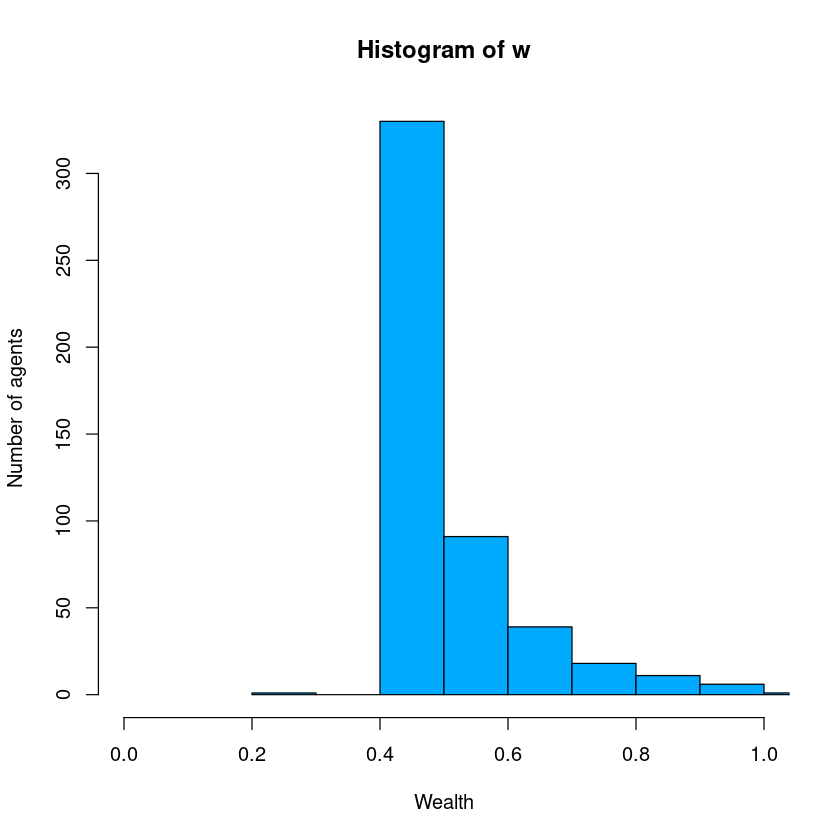



 Final adjusted parameters:
 aa =  1366.818 
 x0 =  0.3532376 
 dx =  0.06380181


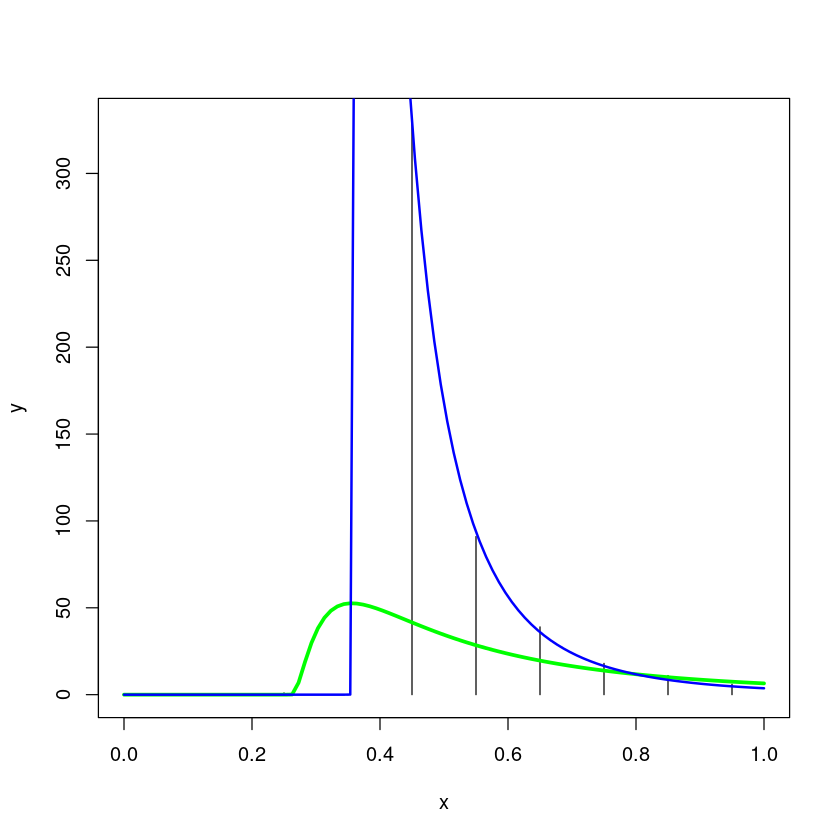

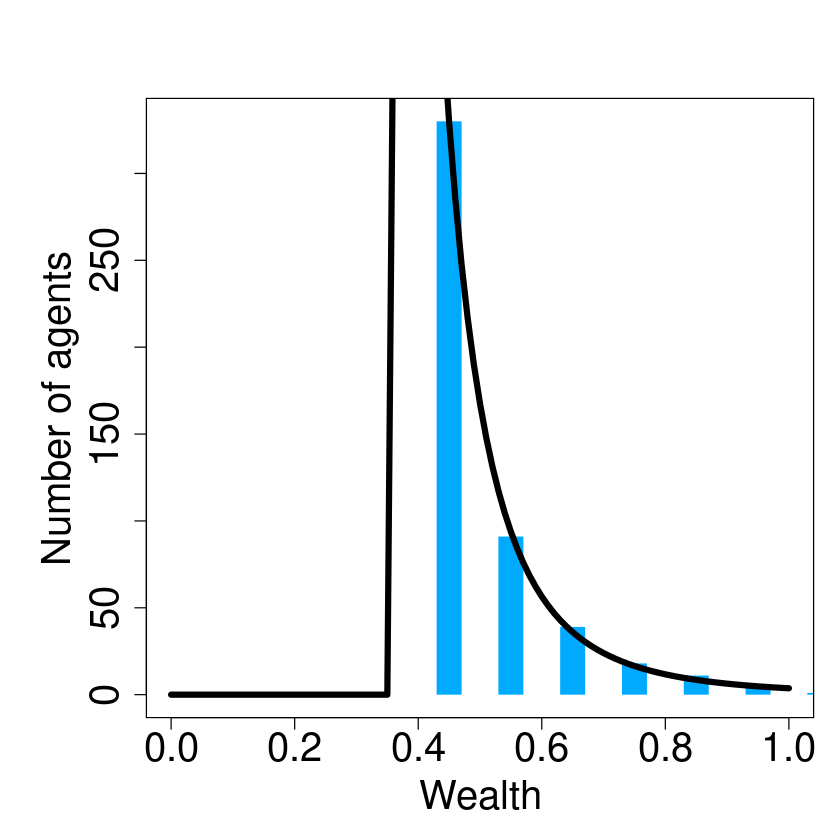

In [21]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.5318354 0.4369152 0.4914955 0.460253 0.4331599 0.4326123 0.445614 0.934618 0.4786827 0.414266 0.4905717 0.4548775 0.4392876 0.4296989 0.4852606 0.4263214 0.4739412 0.4543132 0.413413 0.5900373 0.6356119 0.4441121 0.5692689 0.4660578 0.4109675 0.590544 0.4687903 0.5450443 0.5382248 0.4560215 0.4528553 0.5100409 0.4284526 0.7534332 0.4950043 0.4608228 0.462937 0.441533 0.4706345 0.4751859 0.4829731 0.4158226 0.417222 0.4477876 0.469302 0.4061256 0.4212832 0.6351153 0.410861 0.570899 0.4201031 0.5131335 0.5407219 0.4248441 0.4150336 0.5348719 0.4166237 0.4936662 0.4491858 0.4190914 0.4119536 0.4750196 0.4124236 0.4700761 0.4236062 0.5914913 0.6674229 0.4759051 0.4784468 0.4631148 0.4939144 0.4470983 0.4133901 0.4684798 0.5554886 0.5048985 0.4623513 0.4126505 0.5367601 0.62103 0.4458697 0.4120546 0.5836383 0.6786803 0.4408969 0.433304 0.4480245 0.4447714 0.5101209 0.4148715 0.4311833 0.4620135 0.4528437 0.4569785 0.4653895 0.4400218 0.449904 0.4795861 0.751513 0.4756972 0.5138844 0.4945183 0.5537538 0.4314166 0.4694847 0.4621778 0.4704957 0.5133494 0.4145722 0.5656887 0.6211705 0.4742026 0.4660416 0.4527342 0.4875466 0.5454125 0.4631663 0.9765414 0.4761023 0.6580505 0.5727462 0.4750978 0.6205823 0.9512026 0.4096833 0.5720952 0.6536447 0.6394629 0.4079579 0.7944413 0.9523417 0.595481 0.4844534 0.4627555 0.5525002 0.5095009 0.9241733 0.7739934 0.7582361 0.5243193 0.4164614 0.4592616 0.41032 0.4994694 0.4426797 0.4396403 0.4702763 0.4796693 0.4365051 0.4631955 0.4797652 0.5019157 0.5173912 0.4193006 0.463075 0.4226154 0.5695761 0.5022426 0.4329278 0.4495654 0.5960133 0.4511924 0.4199406 0.4484877 0.4580855 0.5241706 0.5655576 0.4082155 0.5230011 0.5733235 0.6437817 0.4110064 0.9567147 0.4144956 0.4723947 0.4458097 0.4983241 0.4035777 0.5217806 0.5439292 0.4232797 0.4210384 0.8400858 0.8582348 0.4403149 0.4918679 0.6834464 0.4715453 0.4936972 0.4192483 0.6197467 0.7410757 0.4747311 0.448292 0.4193245 0.4497855 0.431211 0.4392528 0.5012911 0.5078825 0.7232713 0.469147 0.4748396 0.5798579 0.5182441 0.4381889 0.4554488 0.4943113 0.4279644 0.8530614 0.4180048 0.4676954 0.4511493 0.4934831 0.7380784 0.5351045 0.5719441 0.8220037 0.4108658 0.5331511 0.4362599 0.4400323 0.6507833 0.4693883 0.5059505 0.6578575 0.5032201 0.4713985 2.948613 0.4924739 0.4166601 0.4929426 0.5251118 0.4388391 0.4835303 0.4743846 0.7990735 0.6167491 0.4034671 0.4454975 0.4145494 0.5175044 0.409805 0.4532145 0.521671 0.4203939 0.4210322 0.4542345 0.4118603 0.4457105 0.4641508 0.4639119 0.5473158 0.4669705 0.811634 0.4703527 0.6118834 0.455815 0.4801507 0.478443 0.4889132 0.6431217 0.4940299 0.414451 0.5185772 0.4208948 0.4256904 0.4527687 0.6199558 0.4321313 0.4477043 0.5886393 0.5183581 0.7395362 0.4954038 0.4103148 0.471232 0.8448722 0.4713388 0.4470436 0.446135 0.4826021 0.4478887 0.5258152 0.4058338 0.6582581 0.4744956 0.59193 0.4705383 0.4449206 0.4406438 0.7215293 0.5240184 0.4271343 0.4210469 0.4122967 0.4432102 0.8226446 0.4971053 0.4804641 0.5319646 0.4306709 0.47811 0.486399 0.4747447 0.454386 0.7063386 0.4902451 0.6133451 0.4755047 0.4530657 0.4319341 0.4469793 0.4396395 0.4814741 0.4430363 0.4515229 0.4147072 0.7330184 0.6876021 0.4826413 1.002205 0.4926882 0.526738 0.5060926 0.5182612 0.6088317 0.4425921 0.4764428 0.558679 0.4417517 0.4337814 0.5948853 0.5143649 1.219821 0.446519 0.4347138 0.4191306 0.4896538 0.4706866 0.4298965 0.5342176 0.6835321 0.4200941 0.4633808 0.8274083 0.5716773 0.4868273 0.4637228 0.4332436 0.4154018 0.5120929 0.5331915 0.4736071 0.5831923 0.4338073 0.4638441 0.5879621 0.511851 0.667797 0.7388857 0.4849705 0.5875652 0.480743 0.4125889 0.5247527 0.6479463 0.4778793 0.4812445 0.4237602 0.4366122 0.4476462 0.4825807 0.5276404 0.4756127 0.4410754 0.4541576 0.7729476 0.7415144 0.5144506 0.4155815 0.4488825 0.470022 0.4518085 0.4696501 0.8297544 0.542318 0.4603473 0.4415498 0.4470476 0.44398 0.4296839 0.4427651 0.4193072 0.4229843 0.5769188 0.4659888 1.112743 0.481213 0.6178136 0.4379307 0.5253631 0.647134 0.4213241 0.4795576 0.436383 0.4406762 0.413685 0.4270133 0.4668174 0.4470849 0.4564448 0.4244523 0.4606481 0.6335928 0.7573234 0.4611149 0.497263 0.4095072 0.4136189 0.4936924 0.4690789 0.4666244 0.4352106 0.4891333 0.4551013 0.417768 0.4207638 0.4952181 0.8779845 0.4508887 0.4276303 0.4851816 0.4942046 0.4501694 0.6539244 0.4308144 0.4989991 0.4163094 0.4614842 0.4475408 0.5445878 0.5064989 0.4577597 0.5396555 0.4495339 0.4675108 0.5267821 0.4275152 0.5178013 0.6342016 0.4629183 0.6261742 0.4354125 0.4557902 0.6544185 0.4500783 0.4710176 0.442016 0.4238846 0.4081301 0.4346519 0.5164841 0.4422245 0.55599 0.7386679 0.429444 0.5018048 0.4805838 0.4147448 0.6613159 0.6926773 0.4378824 0.4403038 0.6907956 0.4862554 0.4757273 0.6388924 0.4766532 0.4496122 0.5548299 0.4994406 0.4673908 0.5410345 0.4692643 0.5877151 0.4311509 0.8677872 0.2995267 0.4168945 0.4614443 0.64702 0.4462924 0.4713342 0.4904516 0.5100432 0.4161784 0.4585592 0.4304852 0.6854406"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


 Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.7
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 3


 Agent wealth histogram:

 Histogram data frame:

 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 y =  76 274 108 23 7 5 2 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 y =  76 274 108 23 7 5 2 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.

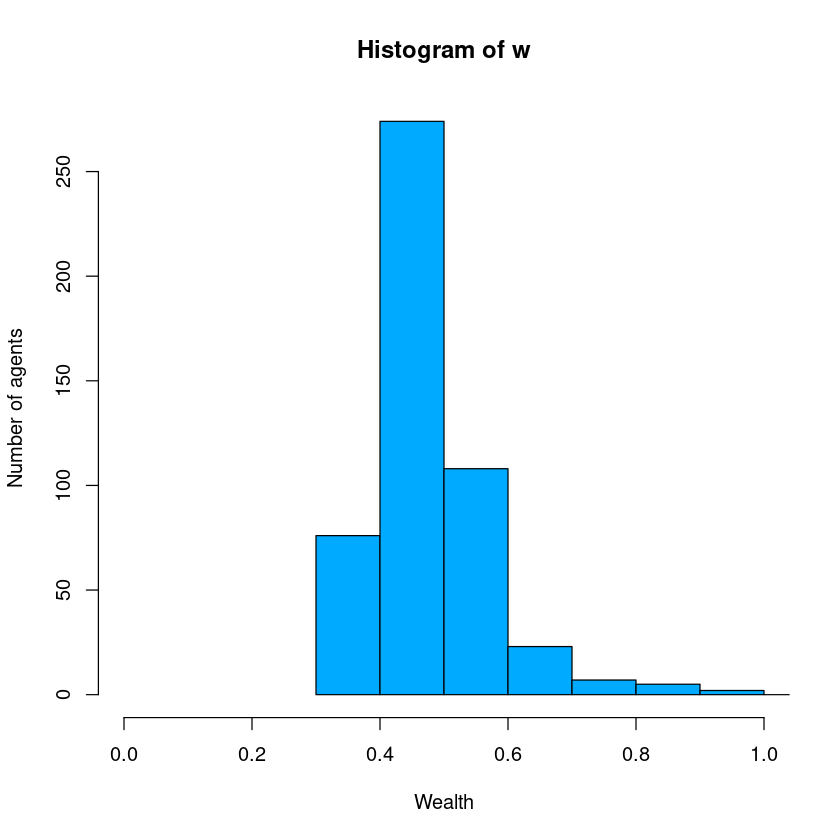



 Final adjusted parameters:
 aa =  988.7661 
 x0 =  0.3464755 
 dx =  0.07608574


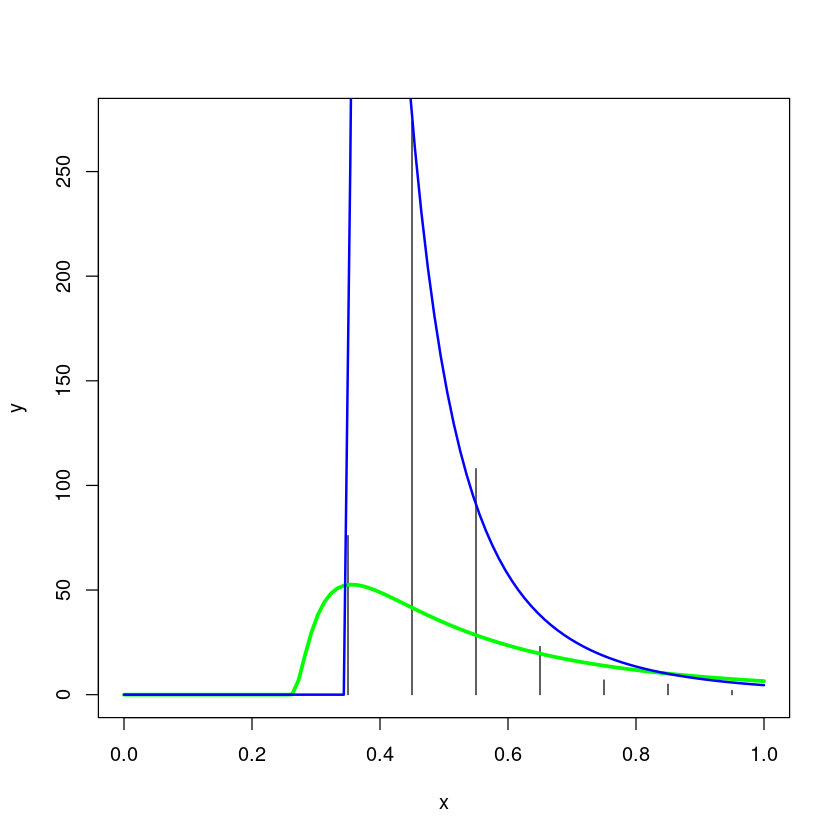

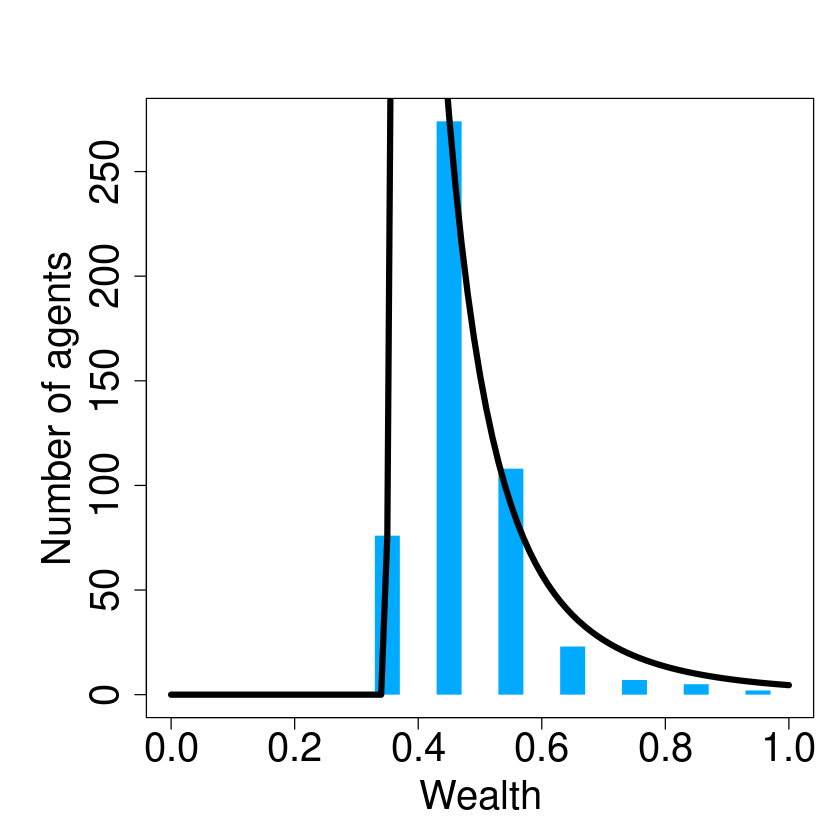

In [13]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.4360184 0.4309453 0.5690926 0.4345692 0.5001007 0.443095 0.5302097 0.4226243 0.5175382 0.8770896 0.4299868 0.8689054 0.4137921 0.4664327 0.4411664 0.3902516 0.3939855 0.5018846 0.4999777 0.444699 0.4557923 0.4558522 0.7410204 0.5279232 0.4658946 0.6852167 0.4395418 0.4494714 0.4066014 0.4618853 0.4851831 0.5072305 0.4610397 0.5284076 0.488712 0.4469406 0.4180071 0.4873908 0.4697303 0.5984609 0.4675424 0.539747 0.4192256 0.4663702 0.5239896 0.5069084 0.4695936 0.4075091 0.4391107 0.4399768 0.458496 0.5084988 0.519 0.7286831 0.5235745 0.4678496 0.4571251 0.4757378 0.3996364 0.430304 0.4529896 0.4265937 0.4741764 0.4945929 0.4509239 0.4002753 0.738622 0.3958294 0.6085259 0.4286104 0.424056 0.3784402 0.5630425 0.6064225 0.4152986 0.6957048 0.3904715 0.5939457 0.4926111 0.6724966 0.4004367 0.385721 0.4331426 0.5514428 0.4797383 0.5235575 0.3985137 0.5505069 0.5553153 0.4990809 2.199588 0.3654842 0.4661435 0.446116 0.5339673 0.3994784 0.4593153 0.3580201 0.4987876 0.4624768 0.4019032 0.5238078 0.4556707 0.4007729 0.3628425 0.6108867 0.505852 0.456882 0.5571851 0.5239512 0.4328885 0.3665691 0.4395019 0.4035442 0.4082145 0.4652801 2.709609 0.5190502 0.5467349 0.4218638 0.5294947 0.3865397 0.5553077 0.8479177 0.3709154 0.4566345 0.503443 0.3879899 0.4325114 0.3541489 0.4515736 0.4267138 0.4549512 0.5715473 0.4040369 0.4502488 0.4568219 0.4028869 0.6546048 0.55277 0.4308254 0.4793503 0.367068 0.4321516 0.7541769 0.3871416 0.5761809 0.4083955 0.4762691 0.4187269 0.5018427 0.4713621 0.3659508 0.3718877 0.659873 0.4319616 0.468629 0.4445138 0.4562947 0.4915167 0.7936324 1.164784 0.3650443 0.4212337 0.5151879 0.439822 0.4512197 0.4893466 0.4871004 0.3757403 0.5209841 0.5849906 0.4738931 0.4357099 0.5915712 0.5854765 0.3796234 0.3859521 0.6004004 0.4309912 0.4577236 0.4841583 0.4714596 0.5158014 0.5776057 0.5824111 0.4213585 0.4823285 0.4516807 0.4601902 0.3824051 0.5315716 0.3666599 0.5494453 0.5098489 0.4614708 0.3982922 0.3658151 0.5006775 0.4263237 1.113049 0.3674911 0.5002539 0.558568 0.4167243 0.5458742 0.4356095 0.4378673 0.4292283 0.5503081 0.6002187 0.4533799 0.4145565 0.4848257 0.375784 0.5680442 0.5410296 0.4666926 0.4681683 0.4361604 0.5930666 0.5090133 0.4568964 0.5512731 0.4174283 0.4345099 0.3917892 0.368144 0.615055 0.403351 0.5192302 0.4362926 0.4478228 0.4321289 0.4782721 0.6858897 0.4540691 0.376205 0.3886654 0.3688355 0.4008408 0.4790814 0.4821123 0.7444674 0.6963159 0.3500601 0.381882 0.4163177 0.4217883 0.4001778 0.3782021 0.430225 0.4204161 0.4721731 0.4716383 0.3911626 0.4812766 0.4199121 0.5406939 0.5172466 0.4261353 0.4518353 0.4493701 0.4712896 0.4634576 0.6956049 0.4877001 0.5438507 0.4625861 0.4949905 0.3960941 0.5409511 0.5712049 0.3881722 0.6136244 0.4212196 0.4742414 0.4319849 0.4938524 0.4719312 0.3983782 0.48757 0.5381828 0.5041354 0.4435399 0.4744889 0.4033458 0.4188067 0.3959314 0.5196198 0.5874641 0.403785 0.4526458 0.4549227 0.4100161 0.4846932 0.3822816 0.3933847 0.4200294 0.5040003 0.4009361 0.478984 0.3724439 0.395835 0.6413575 0.4218341 0.4200527 0.4099517 0.3727924 0.5595807 0.4089345 0.41112 0.3839447 0.482169 0.3579261 0.5146422 0.3442847 0.4462336 0.4979921 0.5105689 0.435475 0.411537 0.5668348 0.3909538 0.4608018 0.5584812 0.4331127 0.466251 0.4301709 0.6725565 0.4285461 0.3960429 0.7260193 0.4411338 0.4698012 0.5762886 0.4221019 0.597937 0.4309513 0.4922342 0.5353984 0.3820538 0.4955234 0.6249029 0.5745707 0.4074633 0.449845 0.4952503 0.8302846 0.9229459 0.4437176 0.3711439 0.50135 0.524389 0.5002096 0.4129854 0.4660508 0.4722015 0.4252661 0.5587479 0.4191517 0.502186 0.5100803 0.5517009 0.6463552 0.449212 0.4385624 0.5030531 0.4447046 0.4793065 0.4752604 0.4797977 0.4948423 0.4886704 0.4965983 0.40369 0.4422929 0.5345213 0.4991105 0.3699245 0.4400224 0.460259 0.4210158 0.4436455 0.5758261 0.5075617 0.3514185 0.549246 0.4902379 0.479836 0.3462219 0.6559519 0.4282745 0.4141622 0.4597406 0.3846142 0.4374322 0.3577369 0.4161704 0.4987439 0.412554 0.5471281 0.6467062 0.3620676 0.3995575 0.5554749 0.4651786 0.427244 0.3709669 0.3830268 0.4612879 0.4250471 0.4064627 0.4595536 0.5125115 0.52277 0.6062871 0.5227723 0.511704 0.4031611 0.4546022 0.4241393 0.405907 0.419536 0.4770503 0.4600216 0.9574663 0.4007231 0.4382115 0.390385 0.4160346 0.4891986 0.4186224 0.4071478 0.3903729 0.3800823 0.384681 0.6542282 0.4352718 0.4512383 0.4662599 0.4640992 0.4040394 0.395127 0.3933019 0.4064542 0.3948062 0.4893346 0.4639721 0.4692535 0.4032886 0.4130139 0.4762828 0.5035633 0.4470784 0.5439412 0.5081107 0.4296161 0.5650126 1.168016 0.4065945 0.4318617 0.5000662 0.4056553 0.3598424 0.5236985 0.4554056 0.4400132 0.4342048 0.4768177 0.4408384 0.5999523 0.467487 0.4770548 0.5256297 0.4185891 0.4960306 0.4399324 0.4317072 0.3981658 0.4585343 0.5533048 0.374709 0.8095109 0.4206971 0.4435709 0.4426352 0.4408531 0.5582386 0.559683 0.4456997 0.4859147 0.454442 0.3805724 0.5288216 0.483395 0.5000335 0.5785024 0.46306 0.4638568"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)



  Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.7
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 2


 Agent wealth histogram:

 Histogram data frame:

 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05
 y =  33 284 125 34 13 5 3 1 0 1 0 0 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05
 y =  33 284 125 34 13 5 3 1 0 1 0 0 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.4343434 0.4444444 0.4545455 0.4646465 0.4747475 0.4848485 0.4949495 0.5050505 0.5151515 0.525252

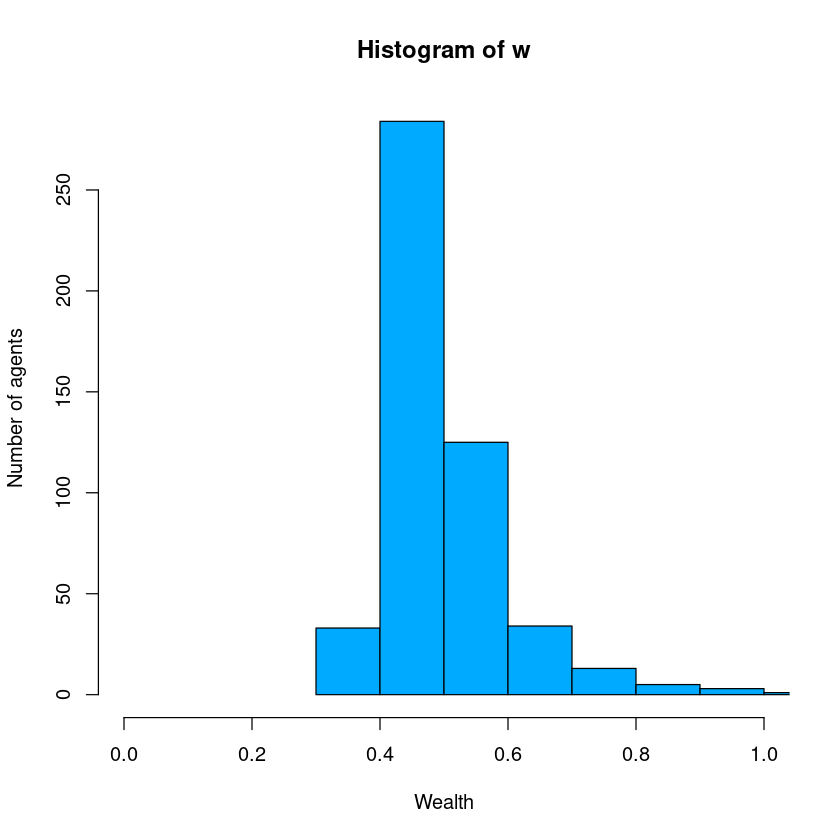



 Final adjusted parameters:
 aa =  832.1096 
 x0 =  0.3469043 
 dx =  0.09004541


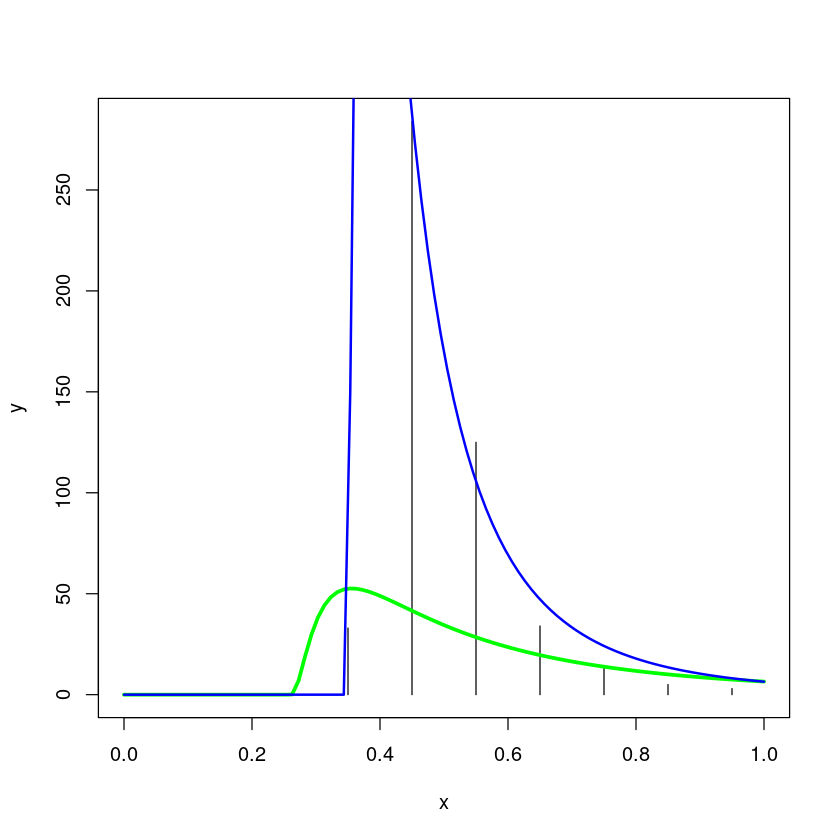

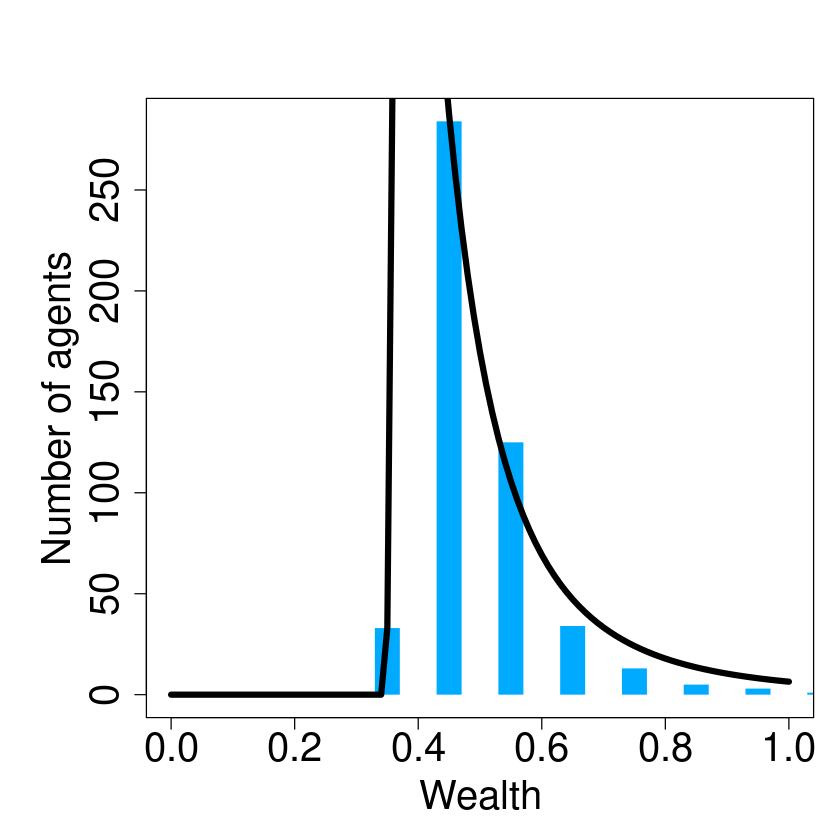

In [14]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.4971475 0.4513396 0.5161418 0.4795669 0.4439091 0.4155396 0.4219826 0.423856 0.4291713 0.6227504 0.5769157 0.5684318 0.3872043 0.6190991 0.5189819 0.4450962 0.4116349 0.8021343 0.3901739 0.4307688 0.4073777 0.4309907 0.6072583 0.5884265 0.4165945 0.3728837 0.6401951 0.404572 0.4406984 0.3579186 0.6595017 0.475986 0.4450561 0.5256696 0.4926329 0.4455471 0.5374967 0.4445088 0.4080389 0.4485644 0.4281713 0.4904015 0.65419 0.3558559 0.4591114 0.3908924 0.4832854 0.5979907 0.4356787 0.5800992 0.4119695 0.4516563 0.38668 0.3770192 0.5198997 0.4293077 0.474012 0.3877729 0.4440501 0.4026158 0.5467218 0.4296208 0.4928837 0.4883258 0.426192 0.54417 0.4063997 0.5396189 0.5349068 0.4236246 0.4313229 0.52076 0.6557027 0.4646634 0.4379374 0.4656369 0.4465813 0.500561 0.4742756 0.5016674 0.5056346 0.4135843 0.4521291 0.4344656 0.5196235 0.4648376 0.4072308 0.519011 0.4308346 0.6116172 0.8880887 0.6195498 0.489548 0.3546215 0.5588724 0.4643796 0.521258 0.6763668 0.6973293 0.7020427 0.4074604 0.473391 0.5276632 0.4796634 0.5392677 0.4108419 0.4835141 0.4514392 0.5251417 0.5190982 0.9008267 0.440325 0.4074159 0.6100566 0.5105547 0.3985798 0.413009 0.6692383 0.4543744 0.4811755 0.4188257 0.4318512 0.48918 0.5014978 0.6163177 0.6128658 0.5738812 0.5186872 0.4645322 0.4759845 0.5066418 0.4306874 0.4231106 0.7951113 0.5419696 1.056478 0.4986208 0.4638634 0.5620821 0.4413166 0.4104938 0.4930569 0.4640288 0.4718059 0.4754024 0.4200109 0.5943988 0.6618627 0.5712013 0.5146587 0.6806189 0.4837658 0.5512504 0.5692238 0.3918369 0.4436967 0.5514851 0.5124282 0.5551938 0.5890315 0.5110934 0.7864119 0.506857 0.4886996 0.471656 0.5029297 0.4881783 0.4401626 0.5744157 0.5428865 0.4244084 0.4677403 0.592852 0.3754824 0.4704504 0.4537348 0.3970054 0.3786108 0.4477947 0.6215779 0.5302934 0.4336942 0.3959361 0.4212756 0.4637457 0.6241875 0.4301612 0.5050622 0.4648184 0.4761237 0.4573351 0.6181138 0.4981428 0.429453 0.4083176 0.4609361 0.4648875 0.4874071 0.4799955 0.4282512 0.5253296 0.4992129 0.7638512 0.5237916 0.4564471 0.4712443 0.4923151 0.46081 0.4930916 0.4999243 0.4934016 0.5155269 0.4553039 0.4415173 0.3700732 0.4479183 0.4328713 0.6509379 0.5230766 0.4395803 0.4788106 0.4170599 0.4275935 0.5276199 0.4435709 0.4514248 0.4350033 0.7333237 0.5170376 0.3930927 0.4413163 0.6741849 0.5614846 0.471089 0.4504982 0.394019 0.4605749 0.9097058 0.5858841 0.5045462 0.7258772 0.6013152 0.5765962 0.4635255 0.5743326 0.5702419 0.5680102 0.6039835 0.5380393 0.4145651 0.4928113 0.5792957 0.5184682 0.4976502 0.4168881 0.443891 0.465727 0.4618622 0.3962998 0.4278373 0.5983233 0.4163447 0.474322 1.275456 0.4721923 0.5026352 0.4775064 0.8930623 0.495261 0.5593297 0.4296591 0.4323886 0.3843897 0.4262619 0.5294356 0.4615416 0.5665279 0.4436846 0.4606406 0.4551983 0.5283836 0.5285141 0.3961657 0.3973768 0.4728093 0.4605788 0.4593767 0.462311 0.6171153 0.415527 0.5439531 0.4253049 0.5273074 0.4238794 0.4026191 0.5101158 0.5876833 0.429173 0.5728529 0.4328086 0.4735981 0.4127917 0.6640406 0.5623486 0.4735977 0.6637471 0.4713707 0.4135997 0.4465022 0.4642431 0.465763 0.5315214 0.7451129 0.4083983 0.4193223 0.4774568 0.5045468 0.5160701 0.4210009 0.4789875 0.5459786 0.4612293 0.4362196 0.3926917 0.4899595 0.5049543 0.5162357 0.453938 0.5051588 0.5706628 0.6966997 0.6201561 0.5402589 0.5157384 0.4827308 0.466048 0.4726036 0.4305571 0.4501095 0.3910651 0.4848358 0.4493094 0.4989125 0.4193572 0.5517034 0.4828427 0.4368702 0.4629894 0.426813 0.5117412 0.6498086 0.7555794 0.4379274 0.7082431 0.464996 0.41192 0.4830005 0.4417529 0.4830399 0.3699948 0.4763115 0.4147649 0.6131378 0.4312963 0.4214325 0.9921708 0.4511399 0.5386527 0.5067139 0.4252177 0.4332713 0.6745662 0.5698405 0.52098 0.3801794 0.5396419 0.4475821 0.4419399 0.4068655 0.4732804 0.4157432 0.5062391 0.4632701 0.504487 0.4678589 0.4558411 0.5777734 0.425102 0.4793461 0.7422033 0.3768524 0.4323277 0.4460962 0.7065686 0.469234 0.4707155 0.4877785 0.434813 0.5740965 0.4521173 0.4851191 0.5815181 0.4668292 0.5277146 0.4262904 0.469791 0.4748898 0.5062883 0.4774178 0.5302977 0.4651207 0.4145882 0.4028152 0.4628006 0.4841811 0.7561283 0.4627926 0.5611471 0.4609625 0.4026236 0.5305089 0.4507587 0.4231741 0.4539315 0.4558713 0.4103908 0.4120257 0.5180849 0.5222859 0.8631047 0.4971815 0.7026188 0.527825 0.4255162 0.4194629 0.4747772 0.401397 0.3732815 0.4316061 0.4793617 0.4556987 0.5057537 0.4900173 0.4151024 0.4699236 0.5811708 0.5665326 0.5047419 0.3991735 0.6140032 0.4857309 0.5244601 0.4867833 0.5276483 2.029398 0.5064365 0.4108134 0.3917332 0.5053859 0.5031589 0.4112442 0.4272501 0.4504129 0.4549426 0.4684238 0.4454534 0.5745177 0.5191488 0.4075963 0.4136225 0.4980008 0.4312433 0.4943239 0.4318968 0.4905559 0.5208854 0.3956622 0.4028774 0.4359403 0.4354547 0.8183193 0.5100255 0.4370002 0.4167756 0.5114147 0.4126898 0.4875198 0.6140567 0.5737111 0.4457544 0.4473966 0.5229939 0.4699302 0.4303319 0.3895601 0.4562382 0.4072678 0.4914199 0.4132563 0.4512816"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


  Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.7
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 1


 Agent wealth histogram:

 Histogram data frame:

 x =  0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65
 y =  1 61 281 105 31 8 4 3 1 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65
 y =  1 61 281 105 31 8 4 3 1 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.

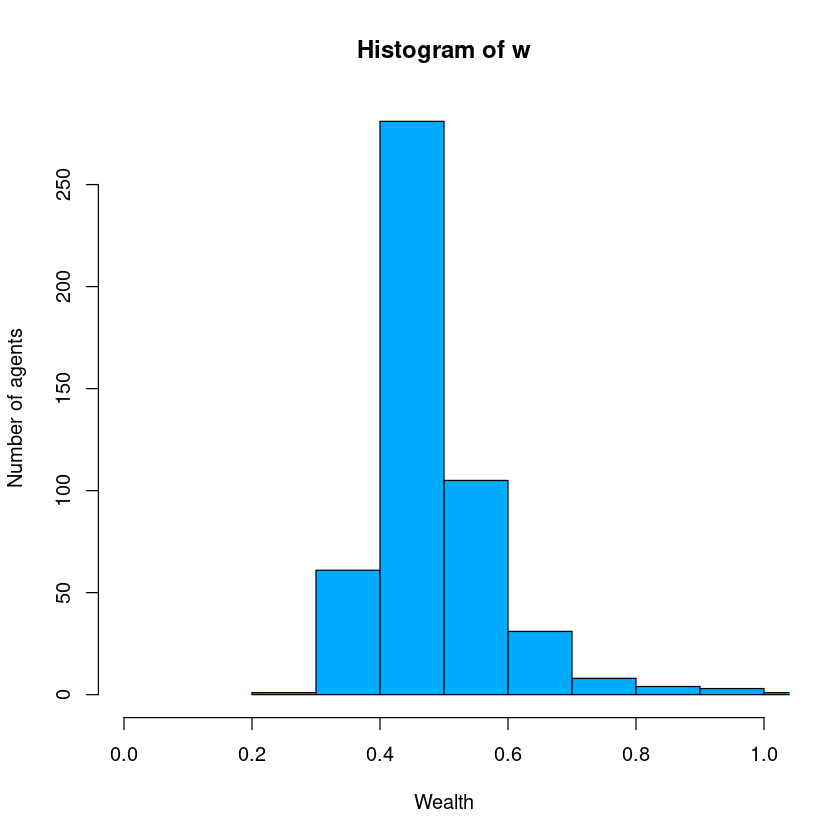



 Final adjusted parameters:
 aa =  1006.944 
 x0 =  0.3468489 
 dx =  0.07607741


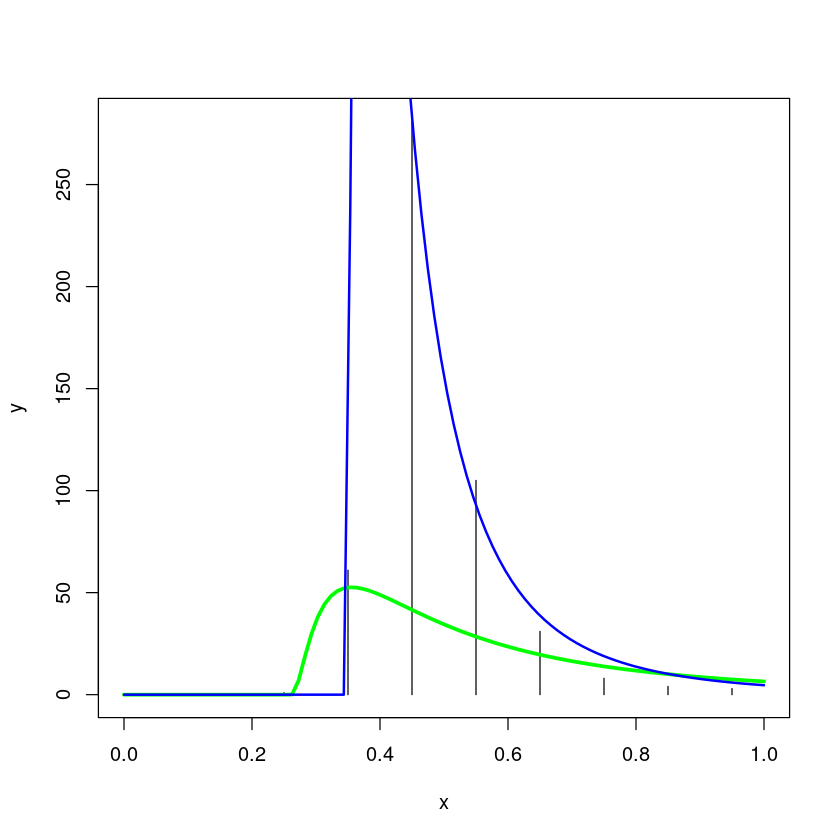

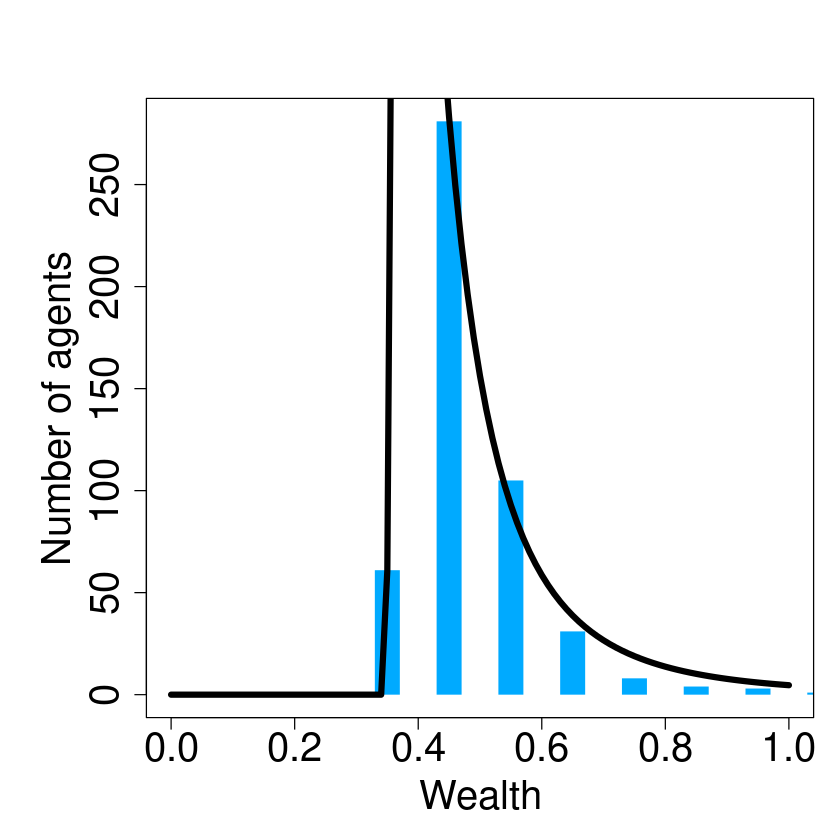

In [15]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.4037757 0.8021221 0.4865296 0.4905015 0.4037375 0.3491213 0.5143133 0.4127632 0.415394 0.3426019 0.4374362 0.6875814 0.7835744 0.4007509 0.426245 0.4816924 0.4312571 0.4500473 0.5031692 0.3915107 0.4560197 0.460899 0.4294761 0.6778589 0.4285139 0.4040849 0.5775979 0.3895264 0.5817539 0.4676466 0.4394593 0.5227014 0.5284874 0.3974419 0.4939047 0.9704221 0.5212412 0.4467497 0.5317728 0.4223729 0.6667656 0.580228 0.4558461 0.7721736 0.4907283 0.4155895 0.3865343 0.4847572 0.4046305 0.4109282 0.3981653 0.4140991 0.4325136 0.5192316 0.4053325 0.4131284 0.4914621 0.5103601 0.377491 0.4146357 0.4275838 0.4224739 0.4753749 0.469574 0.4367132 0.512467 0.4031797 0.3924646 0.4055979 0.4259405 0.5487151 0.4201694 0.4150775 0.4464947 0.5231256 0.4495469 0.4476461 0.6368087 0.504968 0.4793747 0.4114072 0.4342228 0.4972256 0.5367061 0.4088156 0.5114133 0.4725039 0.4422342 0.5062431 0.5128964 0.5760496 0.4238627 0.5549894 0.419171 0.391572 0.4635797 0.4994615 0.5583489 0.4295112 0.5608819 0.5401947 0.5563417 0.4877502 0.4881654 0.3487614 0.4484376 0.6094906 0.458379 0.4665383 0.3755633 0.4130615 0.5199575 0.4553552 0.4591304 0.4070441 0.4835124 0.488291 0.5173416 0.6709893 0.4655881 0.5114851 0.4630362 0.4570411 0.4634027 0.4659523 0.6069615 0.5137507 0.488316 0.4359739 0.6744675 0.373374 0.4520695 0.5505068 0.4512752 0.4776542 0.4165671 0.4219603 0.4372353 0.4907081 0.4236183 0.4276719 0.4732575 0.644889 0.7563653 0.5031119 0.6823062 0.5019362 0.457412 0.4353893 0.3897501 0.5463093 0.4668881 0.5157854 0.390451 0.5600343 0.4414711 0.4272756 0.4242366 0.4659001 0.4594309 0.4220826 0.4541824 0.4848738 0.4042347 0.3861618 0.6041071 0.382605 0.5200775 0.6661884 0.4167354 1.03709 0.4073663 0.4785056 0.8735734 0.4470355 0.5524705 0.4235483 0.4054097 0.4696348 0.7748033 0.4265953 0.3918922 0.4566196 0.403333 0.4257683 0.5778428 0.3906861 0.38239 0.4823165 0.4926645 0.403219 0.4640577 0.4376257 0.4816777 0.5528251 0.4342231 0.4770614 0.414927 0.6616884 0.5294257 0.4277561 0.4000496 0.5009902 0.3621069 0.4610456 0.5011469 0.4505113 0.4124572 0.3981155 0.6101736 0.5114101 0.4086159 0.5017816 0.3911385 0.4490601 0.3989316 0.4997125 0.7065468 0.5617719 0.476848 0.3902121 0.4224506 0.4849307 1.357491 0.4355376 0.4190914 0.444115 0.4757611 0.5781186 0.4125137 0.4751248 0.441222 0.4482672 0.5017282 0.2656844 0.5006276 0.4724097 0.3631275 0.5301258 0.4726996 0.5309159 0.5286339 0.4668925 0.4838715 0.4682616 0.4816061 0.5289353 0.4747895 0.4416511 0.4333347 2.675339 0.4273781 0.5372687 0.5276984 0.4185119 0.4906988 0.384153 0.541518 0.4173701 0.4656205 0.4942422 0.4092068 0.467913 0.4790311 0.436424 0.5799407 0.4980124 0.4016422 0.3995589 0.4029004 0.4818904 0.4745645 0.3818462 0.5397778 0.5200171 0.3971691 0.6587106 0.4454855 0.3784928 0.4725679 0.4018625 0.3851843 0.3933002 0.4615652 0.5446043 0.53197 0.4342534 0.5884366 0.4249528 0.4331085 0.4278124 0.4200777 0.4693631 0.4595473 0.4328904 0.3884001 0.4023319 0.4440061 0.4209475 0.4103681 0.4585092 0.3936818 0.5360816 0.6466785 0.3970992 0.450005 0.3557723 0.3835523 0.5769041 0.4405957 0.4266329 0.4243979 0.5244597 0.4890474 0.4104438 0.4310063 0.4311388 0.4077738 0.4235162 0.4210866 0.6283206 0.4822581 0.6172781 0.4382254 0.5034998 0.4879936 0.5371416 0.4410482 0.5707096 0.4490633 0.4693628 0.7064889 0.4939685 0.5140505 0.4802345 0.4681185 0.5559582 0.4016042 0.3870983 0.5249915 0.4805398 0.4219363 0.9229743 0.5390291 0.4635654 0.4491018 1.465524 0.5226118 0.4273152 0.5280772 0.4976101 0.5300383 0.4660397 0.5410905 0.499338 0.4028021 0.3555905 0.4214997 0.5052386 0.419304 0.3982317 0.4720774 0.4084039 0.479443 0.384876 0.5422154 0.5075334 0.4622822 0.3989413 0.3848433 0.5932865 0.4642851 0.4105504 0.5029058 0.5884444 0.4832862 0.4007941 0.6574008 0.4107217 0.4330479 0.3919939 0.4063174 0.5753313 0.4770199 0.37729 0.4112746 0.5252545 0.9175537 0.3766376 0.851341 0.657367 0.4541945 0.4583041 0.4859212 0.5108944 0.5313433 0.5157086 0.5763134 0.3639604 0.4072 0.4296294 0.3638194 0.4499253 0.4261862 0.5509025 0.6432915 0.5330233 0.4921719 0.4175528 0.4397519 0.3908867 0.438957 0.4622147 0.5198531 0.3812023 0.5278011 0.3670489 0.4783883 0.481878 0.3956725 0.5868617 0.5587121 0.367639 0.4047503 0.428463 0.4474118 0.3885814 1.121707 0.6158778 0.4485688 0.390809 0.4458296 0.4775309 0.3531127 0.4639277 0.4648696 0.4400002 0.3848913 0.4208616 0.5300326 0.4777835 0.3783158 0.420986 0.735149 0.7245411 0.6132434 0.4654568 0.4452907 0.5281655 0.4287017 0.4159245 0.4729053 0.6379434 0.4482147 0.4720673 0.4441026 0.4695921 0.3767857 0.4857626 0.4690911 0.4319578 0.510552 0.5187016 0.838732 0.4021365 0.5070278 0.5509358 0.5740137 0.4092726 0.6010415 0.3935377 0.612962 0.5199152 0.5184234 0.4016548 0.4892769 0.4599541 0.4018434 0.6042148 0.506379 0.4578877 0.4681894 0.4126253 0.4113464 0.4507228 0.4352705 0.4103061 0.6386263 0.4213399 0.5724016 0.4367948 0.4689375 0.4417126 0.4615827 0.5244491 1.128095 0.4088318 0.6611902 0.6050933 0.6952124"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


  Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.5
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 3


 Agent wealth histogram:

 Histogram data frame:

 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45
 y =  84 224 131 41 11 4 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1

 In wlc_analysis:
 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45
 y =  84 224 131 41 11 4 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.4343434 0.4444444 0.4545455 0.4646465 0.

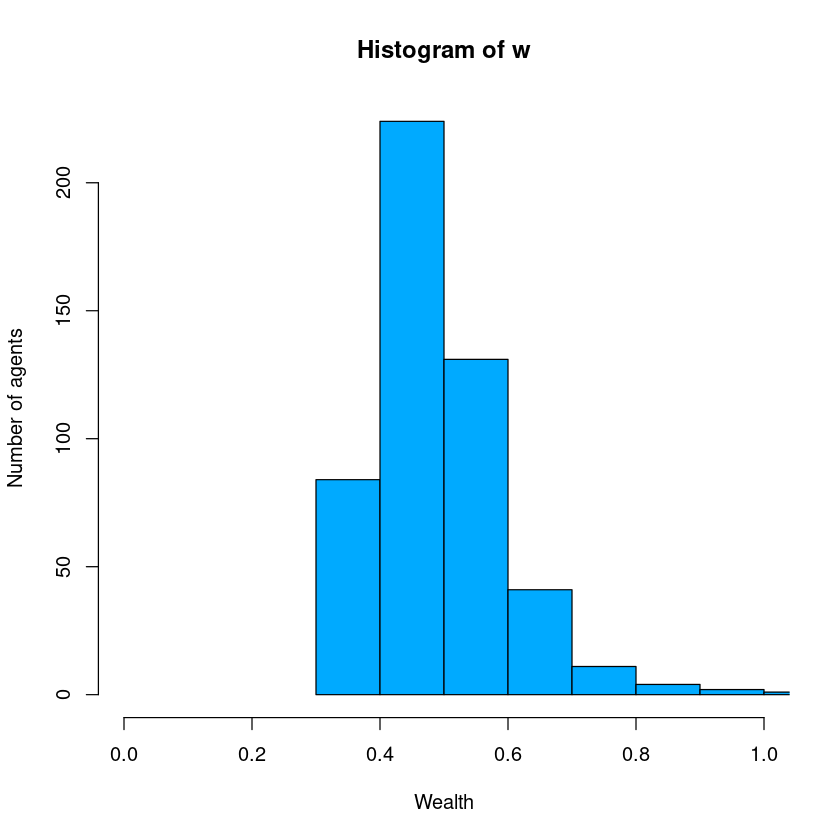



 Final adjusted parameters:
 aa =  685.6267 
 x0 =  0.443194 
 dx =  0.06038934


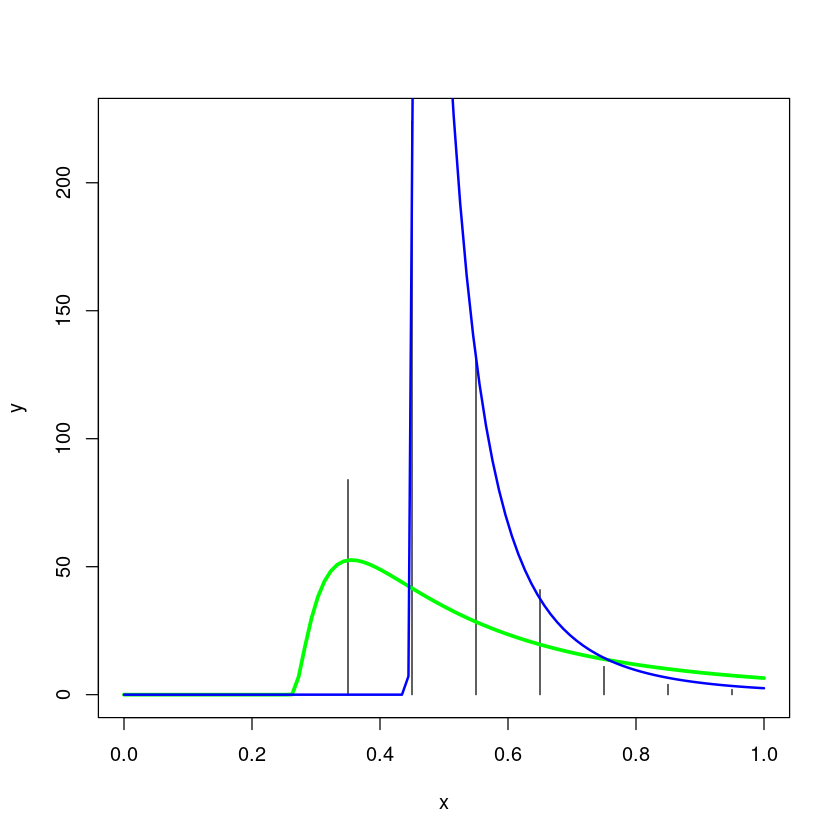

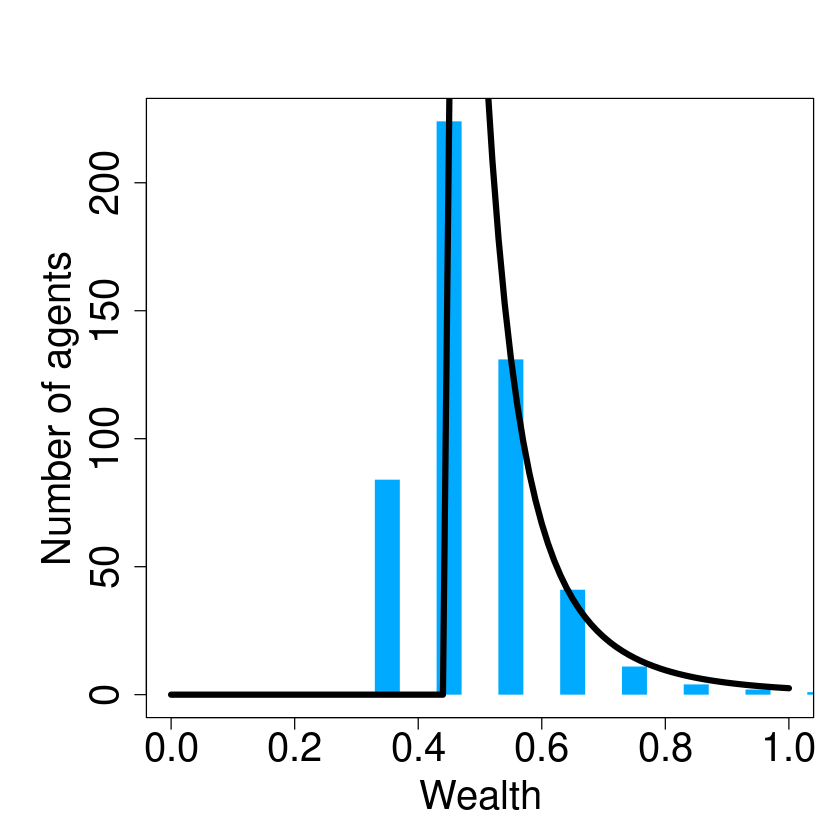

In [24]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.4942325 0.6416308 0.5441282 0.6138404 0.4397565 0.3461609 0.4788987 0.5100611 0.5529822 0.568127 0.465689 0.4517165 0.4920029 0.6338035 0.4777588 0.4477613 0.5669303 0.6404495 0.4604373 0.4681137 0.3986614 0.4697853 0.3568094 0.530796 0.4775425 0.4373584 0.4663248 0.4593051 0.537248 0.597762 0.3770485 0.4486129 0.6151183 0.3586444 0.5487027 0.3322178 0.5213463 0.3773488 0.4839484 0.4522223 0.5777151 0.3824253 0.5621396 0.3788111 0.6203234 0.4706603 0.5365601 0.3391877 0.6060955 0.4501072 0.5061915 0.489625 0.4212973 0.5102319 0.5250105 0.4998934 0.3528272 0.3855181 0.5475455 0.3854509 0.4950135 0.5511875 0.4741087 0.4751839 0.3549618 0.3514586 0.395172 0.4585474 0.5153094 0.5292104 0.3419128 0.4175203 0.5279586 0.5029151 0.5292302 0.5622994 0.6037799 0.5779496 0.3838675 0.4587638 0.4121424 0.3928067 0.4386338 0.5079217 0.5369399 0.4648643 0.4281841 0.4845716 0.4520314 0.545155 0.4413563 0.3409199 0.4260082 0.4775522 0.4758432 0.4088012 0.412392 0.3857574 0.424669 0.4217667 0.3576405 0.4133029 0.3963776 0.7380054 0.5361086 0.4744641 0.3681068 0.4496626 0.7306003 0.5583016 0.5241933 0.4638971 0.5185354 0.5273033 0.4549573 0.3876829 0.4281868 0.4496762 0.6450374 0.6544751 0.5806247 1.939966 0.4838219 0.6448137 0.532664 0.503375 0.5822594 0.5234251 0.4090905 0.5299979 0.5265887 0.5486397 0.450417 0.3506904 0.5701404 0.4242851 0.5122545 0.7227288 0.5416383 0.4142463 0.5829879 0.3810078 0.527647 0.4314875 0.4278214 0.4079036 0.4230158 0.5018832 0.5521712 0.4997282 0.4586681 0.5632487 0.4418703 0.5335271 0.3904376 0.4019927 0.3790073 0.5233086 0.563651 0.5816522 0.4030692 0.5294591 0.4398195 0.5438214 0.3747575 0.3629324 0.3578883 0.4630368 0.4922109 0.5024525 0.4869849 0.3945737 0.4278043 0.4064686 0.4457662 0.5189278 0.403103 0.589674 0.4684437 0.3812323 0.6211634 0.676056 0.5395544 0.3676565 0.4360556 0.3910633 0.4948835 0.6795806 0.5684075 0.4884351 0.5101322 0.6397806 0.459752 0.5389926 0.4588744 0.5278155 0.5279397 0.4507684 0.484272 0.52855 0.3850307 0.3768463 0.5286173 0.5549325 0.3738231 0.5688126 0.4302662 0.5711954 0.5022166 0.4380449 0.4065682 0.366425 0.6225859 0.4778951 0.4978831 0.4457037 0.4308246 0.4109662 0.3824498 0.4740563 0.4192616 0.4487766 0.4819873 0.3650199 0.7317606 0.4522107 0.4257351 0.482397 0.5471242 0.3643707 0.3653814 0.4455786 0.4844662 0.4792683 0.4546825 0.4867315 0.4599515 0.4408657 0.394516 0.3348517 0.4789481 0.5432419 0.4400871 0.4452056 0.5893335 0.3751474 0.5535283 0.421481 0.3417827 0.5874567 0.4483825 0.4904315 0.5237985 1.019328 0.4857025 0.5278665 0.5231516 0.4924381 0.4804743 0.4681128 0.6534863 2.412772 0.5673783 0.4814732 0.3995934 0.5818038 0.5533056 0.4819919 0.439091 0.5821138 0.5296017 0.4033282 0.4942206 0.5634229 0.4041263 0.4755586 0.6440146 0.44253 0.7777265 0.4311307 0.6509093 0.3635089 0.3962292 0.5744254 0.4281041 0.6000412 0.567204 0.4632577 0.4852166 0.4520435 0.5451181 0.3438598 0.6276883 0.5726561 0.4043842 0.3627639 0.476668 0.5249564 0.3803257 0.467271 0.3845245 0.4770132 0.3488013 0.525119 0.4678204 0.4694565 0.4738838 0.4577666 0.639177 0.5239194 0.4513905 0.4947895 0.346356 0.5338051 0.4341086 0.4251667 0.4651034 0.4657594 0.4784707 0.4986088 0.3623488 0.7757643 0.5477331 0.3939187 0.4254234 0.4362973 0.4070761 0.9360069 0.4753242 0.4511075 0.4979837 0.498593 0.4676343 0.4454912 0.4937891 0.8069848 0.4829863 0.548056 0.4299173 0.4741186 0.5339667 0.3654765 0.5455126 0.5999994 0.4832976 0.5066524 0.4584139 0.5248302 0.6382181 0.4089751 0.3814827 0.5440858 0.9191206 0.5805239 0.6684047 0.4024169 0.5658783 0.4771825 0.5132134 0.4784494 0.3821506 0.6491 0.5888343 0.4249422 0.4328878 0.4679442 0.5199279 0.4108419 0.4022249 0.4860647 0.5358589 0.4966566 0.4378285 0.3581853 0.412749 0.4667585 0.5770583 0.4056997 0.3869752 0.4474816 0.4554675 0.6026839 0.4235964 0.5049243 0.5179242 0.3827412 0.6025339 0.642536 0.4349746 0.4552444 0.4280411 0.4035619 0.7920624 0.579851 0.5380617 0.4254339 0.5572703 0.4128188 0.3356479 0.3892131 0.4391593 0.4326219 0.4646857 0.6038991 0.4072455 0.5369765 0.4234978 0.4203191 0.4522849 0.372514 0.5583689 0.8806565 0.4470412 0.4156686 0.3955102 0.5256418 0.8745541 0.4863131 0.3521404 0.547656 0.4219095 0.3809998 0.4058909 0.5836321 0.4817484 0.3574871 0.8334457 0.4034761 0.7758984 0.6717868 0.4443417 0.6167739 0.448378 0.3432528 0.5102703 0.7075 0.6316341 0.6070603 0.4930051 0.5234605 0.4327601 0.4500808 0.4193496 0.4494046 0.5911223 0.3543912 0.4826515 0.5606049 0.3834516 0.4340094 0.3554678 0.7185993 0.4521137 0.6036037 0.5642322 0.600632 0.4210962 0.4486718 0.3867151 0.5370265 0.4444212 0.4048329 0.4106636 0.3901609 0.5040285 0.6887351 0.4428402 0.4417448 0.3581063 0.5244387 0.6205124 0.3593712 0.4889205 0.7467676 0.4479613 0.4230358 0.4634362 0.4243872 0.4797929 0.4394643 0.4730132 0.3471831 0.3785293 0.6604954 0.6628671 0.5015691 0.5898013 0.4504065 0.4986213 0.5606533 0.3470227 0.4019318 0.4597598 0.3891361 0.5942392 0.4263444 0.5742075 0.5043818 0.6295094 0.6756501"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


  Simulation initiated with the following parameters:
 
 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.5
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 2


 Agent wealth histogram:

 Histogram data frame:

 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75 2.85 2.95
 y =  72 227 135 39 14 7 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1

 In wlc_analysis:
 x =  0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75 2.85 2.95
 y =  72 227 135 39 14 7 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.

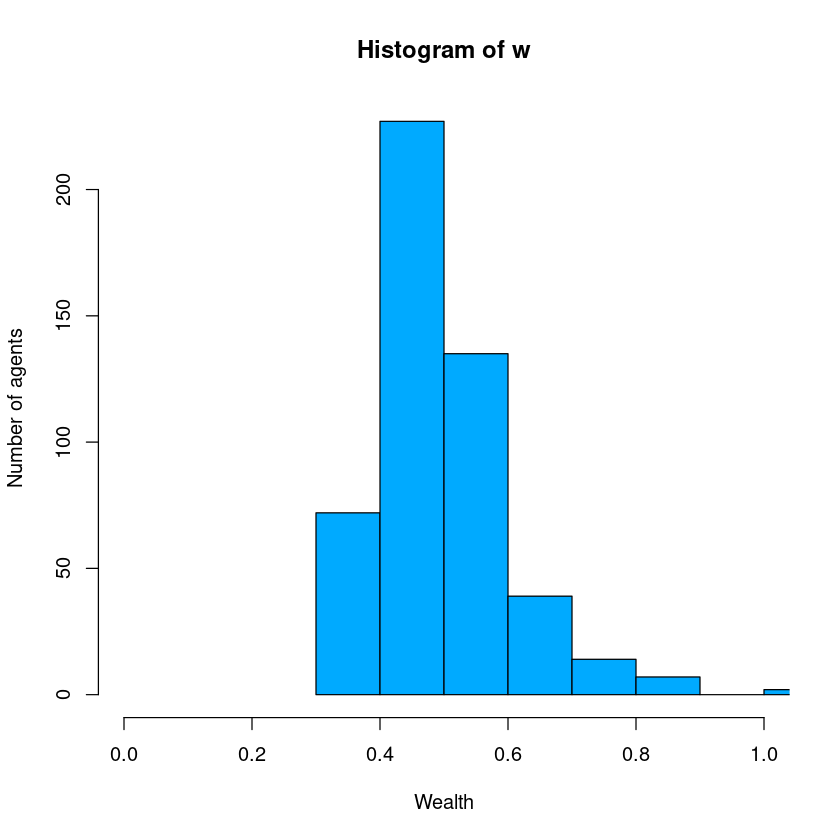



 Final adjusted parameters:
 aa =  528.0771 
 x0 =  0.3425171 
 dx =  0.1199919


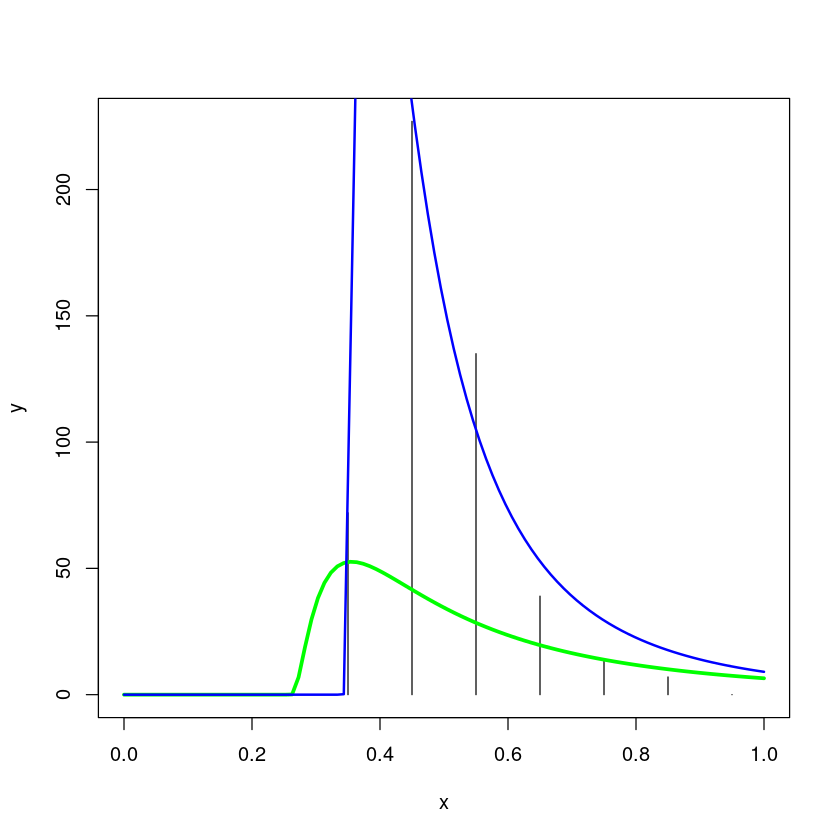

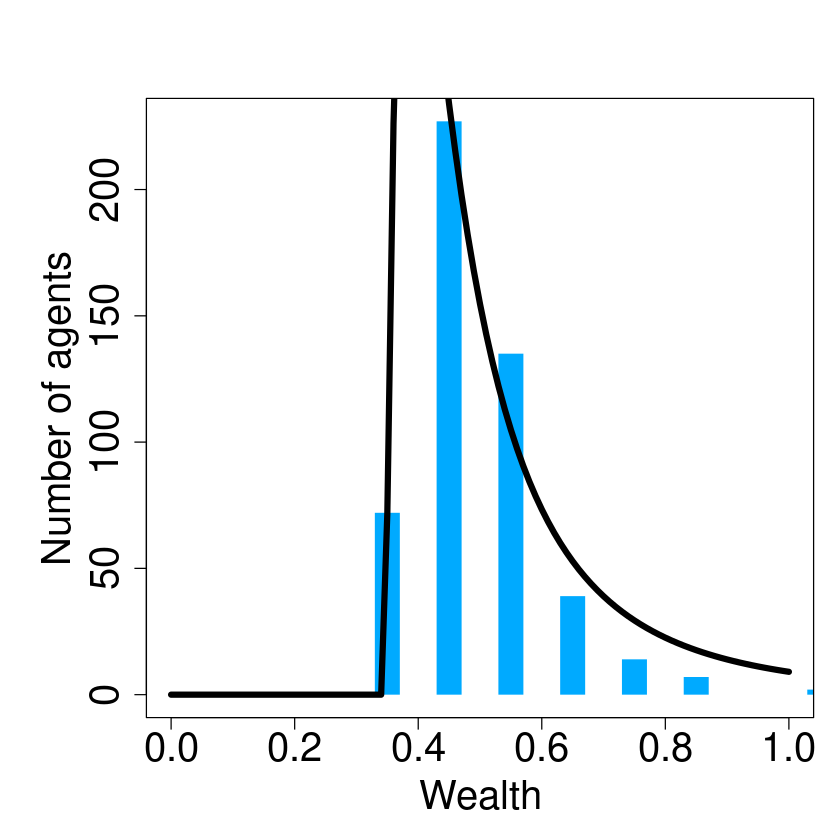

In [23]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.4348907 0.454842 0.3668975 0.4291499 0.4948213 0.5101143 0.4893041 0.3769572 0.5843989 0.4468335 0.4407576 0.5576014 0.7580644 0.3640317 0.41607 0.4861964 0.453575 0.4290582 0.5395543 0.6048336 0.7388254 0.5091056 0.6127656 0.5021988 0.4149774 0.5309864 0.4489398 0.4482011 0.3897741 0.405473 0.5127464 0.4162219 0.55757 0.4321494 0.4926846 0.5491541 0.4864624 0.3512393 0.4696314 0.3831516 0.4980457 1.027515 0.5503977 0.4885139 0.4110205 0.4810991 0.4130169 0.6105587 0.4391934 0.5299113 0.5687648 0.485109 0.5223725 0.4538698 0.5279044 0.5404514 0.368342 0.6354351 0.5119006 0.3898221 0.4425114 0.3921333 0.3505326 0.5708661 0.4747398 0.8344293 0.5171417 0.6248606 0.4442084 0.4143667 0.5968997 0.5475268 0.4207199 0.4765822 0.5276809 0.4233986 0.5157606 0.5615408 0.6076203 0.6954964 0.3724438 0.4427942 0.4880122 0.4522486 0.5470771 0.5369736 0.3479447 0.4073248 0.7588613 0.6153698 0.3913483 0.5320365 0.5517164 0.5315348 0.4147362 0.5616696 0.5930566 0.4726354 0.3404528 0.5445468 0.5950127 0.5357409 0.5366176 0.5354289 0.5241937 0.4284041 0.4929514 0.3662635 0.4838903 0.7044213 0.6184426 0.5340116 0.5381677 0.4262062 0.6259618 0.376166 0.5370984 0.4894565 0.5259698 0.4915814 0.569822 0.3927701 0.4649567 0.5973815 0.5042642 0.4422869 0.4783439 0.4595217 0.5391392 0.4129465 0.4298032 0.5001221 0.4588221 0.4612946 0.4387119 0.4968763 0.3895208 0.3861741 0.5469774 0.3764902 0.5372004 0.5441738 0.3946002 0.6097389 0.5075049 0.394056 0.4980286 0.4953884 0.440052 0.3881991 0.4134265 0.483752 0.4114909 0.5429712 0.4975359 0.487626 0.4164488 0.4635433 0.7585254 0.5164797 0.4582341 0.4931503 0.489067 0.4180792 1.319519 0.4061638 0.6315174 0.4014015 0.469911 0.4540127 0.5190298 0.420403 0.5212854 0.6839915 0.6626341 0.3951181 0.4849202 0.427049 0.4228957 0.6176497 0.4159135 0.3729182 0.5987881 0.5222613 0.5273548 0.3200368 0.6546621 0.6017038 0.4579904 0.3819982 0.5119367 0.473854 0.4325392 0.5706643 0.4346802 0.4459633 0.4255043 0.4815164 0.4190741 0.4040102 0.8342589 0.7164628 0.5245682 0.5339515 0.4026509 0.5710464 0.5590633 0.5020811 0.49153 0.43325 0.5031911 0.4101223 0.3933643 0.462269 0.4505222 0.5326536 0.4289496 0.4872184 0.5604198 0.3881284 0.4581863 0.6921817 0.4513521 0.521973 0.5655316 0.5545088 0.4420507 0.4091059 0.660644 0.5073543 0.492739 0.4789316 0.3880136 0.5042027 0.4063396 0.3995323 0.4896894 0.4543081 0.4445047 0.5070315 0.4515413 0.5415286 0.3846172 0.3779532 0.3677475 0.51758 0.3970549 0.4760451 0.5839469 0.4633695 0.5119894 0.4677699 0.5711997 0.3648079 0.6622886 0.5769732 0.4245574 0.4448171 0.5230453 0.3980733 0.5165506 0.506904 0.4587142 0.5372148 0.4901068 0.4563984 0.3682763 0.4364137 0.4973384 0.4155297 0.4634091 0.6278377 0.8480246 0.4425828 0.4098577 0.389885 0.4571334 0.5079729 0.3309632 0.4275648 0.4496315 0.4188566 0.8227261 0.4758975 0.5746474 0.4441385 0.4908821 0.4669254 0.3802063 0.5516905 0.4409793 0.5289941 0.4359553 0.3943416 0.4805223 0.5591411 0.4574882 0.5025109 0.7941494 0.4623907 0.6836359 0.6401493 0.4856738 0.4873577 0.4254861 0.492483 0.4164772 0.5466037 0.4282124 0.4481879 0.6446337 0.5637966 0.5051607 0.3288224 0.505862 0.4415608 0.446987 0.437423 0.7374728 0.399697 0.421156 0.5077681 0.4802588 0.5099502 0.4530613 0.461993 0.4557643 0.3940284 0.5429865 0.4590219 0.4080849 0.4571192 0.4309688 0.5085073 0.4728554 0.5243559 0.4606024 0.4006464 0.5129076 0.6427552 0.4978955 0.3461195 0.3723572 0.4392757 0.4923571 0.5440958 0.5585497 0.4053394 0.3786346 0.4764254 0.3920995 0.5640098 0.4942934 0.4474976 0.3867498 0.6400949 0.5672849 0.5404201 0.4949892 0.4343893 0.6870568 0.5291625 0.3472166 0.3706939 0.4261227 0.4224411 0.432168 0.4023407 0.6118179 0.5496065 0.4949231 0.6125371 0.4783664 0.5555566 0.4013952 0.458246 0.439966 0.6417497 0.4367152 0.5234587 0.4038796 0.5642326 0.503842 0.4281271 1.052004 0.4582354 0.4094632 0.469117 0.3816453 0.5142735 0.673997 0.367284 2.012951 0.5917114 0.4849996 0.6935419 0.4096674 0.3950601 0.5110367 0.3980047 0.5377966 0.7538293 0.3960025 0.5632571 0.5142192 0.4925875 0.3818918 0.3651619 0.5205348 0.4543467 0.4755881 0.5795081 0.6303678 0.3512207 0.5652257 0.5202868 0.5433526 0.3979549 0.4196969 0.4851308 0.4985481 0.3663589 0.8523963 0.4900209 0.5179231 0.6117046 0.4947542 0.4819316 2.842898 0.8115523 0.4725733 0.430906 0.3619949 0.7113262 0.5406518 0.4144294 0.4211919 0.4613941 0.470764 0.4300989 0.3856778 0.5020526 0.3890662 0.5031565 0.8200031 0.4577522 0.373537 0.5828374 0.3809164 0.482486 0.5675652 0.5678285 0.3603622 0.399994 0.485743 0.4283803 0.5227454 0.4403545 0.4285421 0.7298498 0.4723895 0.4377541 0.4844597 0.4646052 0.6314589 0.4649859 0.3841216 0.7939782 0.4395577 0.4255072 0.3882142 0.4156319 0.5657416 0.4923958 0.4785875 0.4847263 0.440184 0.7207555 0.4800802 2.943677 0.4334706 0.4193588 0.4432623 0.6376634 0.6171665 0.689379 0.5184051 0.521018 0.4927997 0.5033995 0.4617834 0.4014388 0.3534562 0.5393239 0.4309777 0.6610376 0.7164756 0.4531609 0.5762004 0.4270385"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


  Simulation initiated with the following parameters:

 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.9
 Punishment force: f_pun =  0.1
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  FALSE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 3.1


 Agent wealth histogram:

 Histogram data frame:

 x =  0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7
 y =  3 335 71 32 21 11 3 5 3 4 4 1 0 4 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7
 y =  3 335 71 32 21 11 3 5 3 4 4 1 0 4 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.43

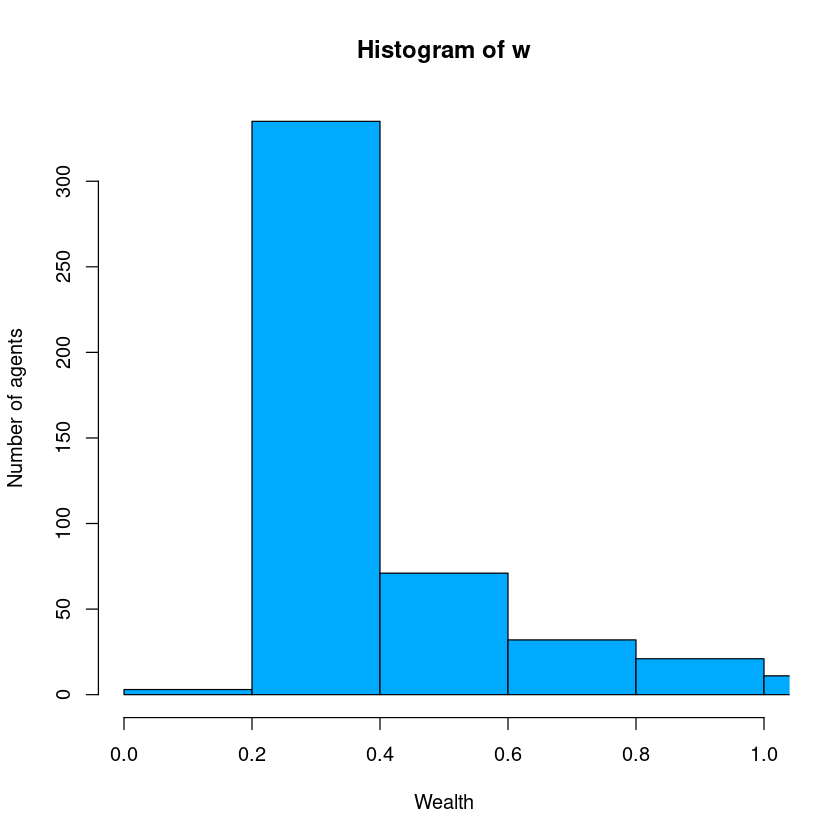



 Final adjusted parameters:
 aa =  1154.13 
 x0 =  0.1517302 
 dx =  0.1119809


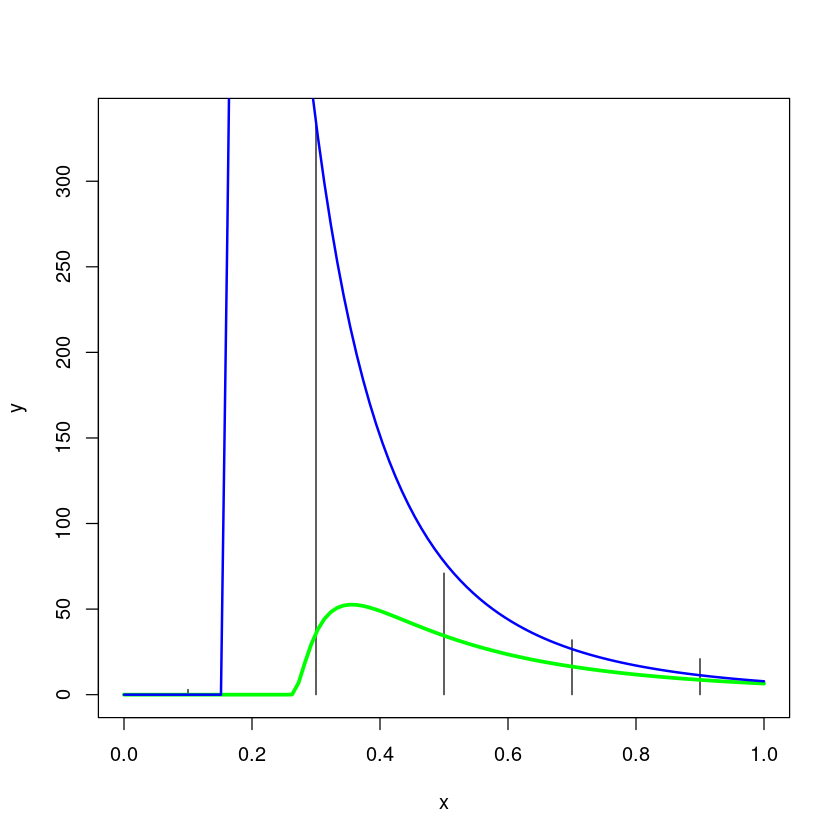

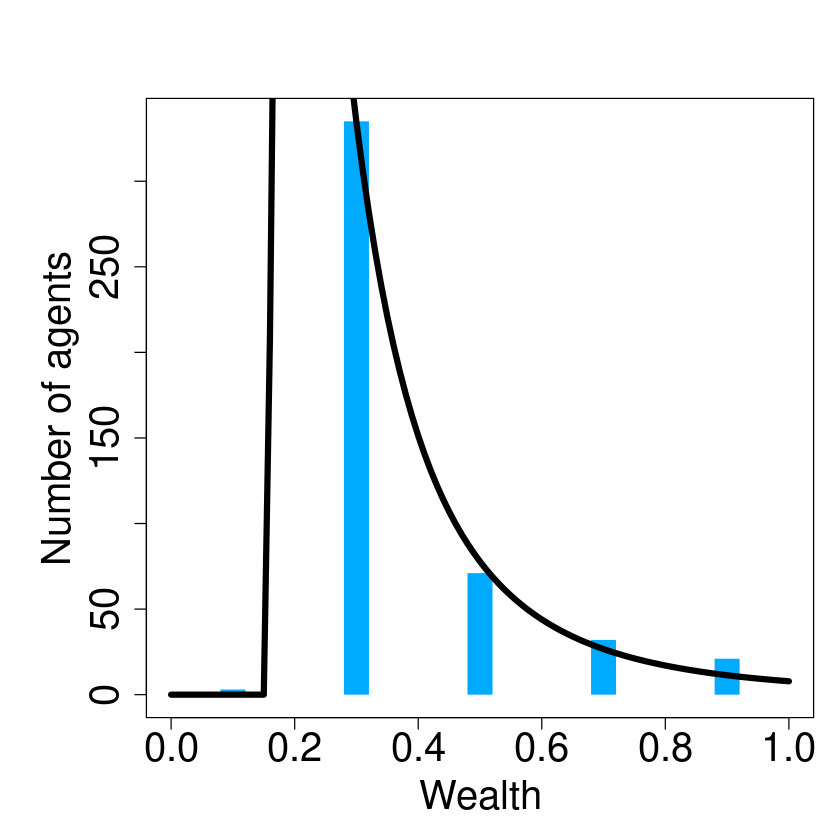

In [6]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.2697834 0.3093033 0.2004009 0.9630584 0.5052651 0.2614584 0.3466915 0.2688107 0.3955275 0.675437 0.5342226 0.2966662 0.7917778 0.2555233 0.3200331 0.3016001 0.2571954 0.4599222 0.4159392 0.5260795 0.302837 0.5311992 0.6699379 0.3255399 0.2556746 0.426823 0.2549129 0.3414484 0.6742863 0.4036359 0.3548321 0.8481625 0.4753415 0.3003448 3.145323 2.656004 0.3299104 0.321732 0.3230786 0.4542255 0.3586383 0.2649734 0.3312506 0.2691692 1.193851 0.5008214 0.2946983 0.3359909 0.3267432 0.3077959 0.3199006 0.2536191 0.2055317 0.2793369 0.3135036 0.2570811 0.7708396 0.3725493 0.3009022 0.2883845 0.2767027 0.2863724 0.2732628 0.2581279 0.322066 0.2898955 0.279584 1.601956 0.3804786 0.5039242 0.2919202 0.2998176 0.3506049 0.4076261 0.2845573 2.024368 0.3622625 1.347298 0.269742 0.2862588 0.8980386 0.3455526 0.5792466 0.3187008 0.3311029 0.241783 0.453488 0.3138219 0.5509245 0.3018854 0.4180153 0.2628829 1.07107 0.2843653 0.2813726 0.3292283 0.5735091 0.4970424 0.2756749 0.316962 1.883048 0.2984765 1.010817 0.3549447 2.355704 0.5555167 0.9181358 0.3157492 0.7718506 0.2917243 0.2718402 0.2799969 0.3569589 0.3182989 0.279588 0.5772373 2.712773 0.2712608 0.2578981 0.2813028 0.3380322 1.508228 0.3825491 0.3685012 0.2834477 0.365785 0.4731787 0.3038283 0.2735578 0.2992361 0.2671114 0.3109074 0.2645614 0.2178923 2.164669 0.2536192 0.3012106 0.3228217 0.2653167 0.2403189 0.4808679 0.4626671 0.4878686 2.067617 0.2891111 0.2751124 0.3255155 0.3463106 1.056175 0.2240123 0.2234076 0.3021726 0.4161409 0.2622984 0.2130222 0.3056396 0.3408151 0.2501775 0.3503355 0.3825977 0.6591376 0.3666583 0.2931489 0.2962096 0.3630903 0.278529 0.3479877 0.31757 0.1942733 0.3504401 0.3595773 0.3061806 0.7585046 1.474007 0.2885838 0.3621879 0.3322433 0.2718124 0.3270187 0.7057534 0.2937202 0.4857915 0.1976772 0.2022603 0.2607738 0.2756236 0.3230023 5.686921 0.3255887 0.6672059 0.3062605 0.2823014 0.2613377 0.3079338 0.2730705 0.5772718 0.9009295 0.2656341 1.57217 0.2825699 0.3474897 0.6647932 0.330089 0.3407652 0.2569518 0.2595291 0.640298 0.7362339 1.666057 0.606185 0.372287 1.144918 0.2960358 0.4311645 0.373459 0.4150633 0.2502776 0.2989544 0.2477964 0.872793 0.3222904 0.3194353 0.3085143 0.3148028 0.6058493 0.3717316 0.3011282 0.8186718 1.746886 1.040123 0.3251549 0.2329837 0.3441407 0.5559882 1.015951 0.3241496 0.2537228 0.4119857 0.2750776 0.2782313 0.3001691 0.444279 0.4966521 0.3010983 0.3810602 0.3316412 0.2213101 0.5436471 0.709644 0.3604432 0.3670871 0.276657 0.2886026 2.670727 0.2760956 0.2191733 0.3075733 0.2837949 1.509646 0.2660325 0.3468312 0.305538 0.297731 0.3922032 0.723058 0.2969096 0.5223684 0.6712849 0.2731512 0.3225134 0.2658974 0.4236581 0.8836671 0.2606641 0.3483533 0.3761499 0.2960737 0.2765407 0.2941316 0.263468 0.2709343 0.5079835 0.2690204 0.4467438 0.2652009 0.3072334 0.3053396 0.2521339 0.3305911 0.8745284 0.9594049 0.3590156 0.3417432 0.5955986 0.3127491 0.2281814 0.2593728 0.2697791 0.320231 0.3207706 0.258537 0.3980584 0.3011338 0.2922536 0.2393194 1.160318 0.9554143 0.4089548 0.2836628 0.2550228 0.4136473 0.2964314 0.2837548 0.2641286 0.821943 0.3017914 0.6162975 0.2287026 0.9271201 0.2207085 0.8106387 0.2749704 0.3263321 0.2752296 0.3018313 0.3240671 0.3137196 0.2840551 0.2878435 0.3228442 0.6995092 0.1983681 0.6123468 0.2722607 0.3651765 0.3477415 0.4458646 0.8201693 0.5221132 0.2320927 0.4799681 0.3437636 1.408707 0.492867 0.4371835 0.2676259 0.4043833 0.2832167 0.2748588 0.2562861 0.2374605 0.7907289 0.6553432 0.3081709 0.2432925 0.8165356 0.300042 0.2855331 0.277059 0.5942119 0.3686402 0.8809251 0.3551154 0.3082641 0.3019044 0.2787428 0.2831838 0.4928353 0.8186845 0.3767099 0.3130259 0.3233786 0.2545306 0.2649698 0.7200547 0.3210976 0.708057 0.3686345 0.2652098 2.094455 0.2618816 0.2278036 0.3050788 0.3308006 0.7537801 0.353865 0.528371 0.3555956 0.2814576 0.3353606 1.878214 0.3670731 1.91618 0.3777193 0.2587702 0.5132065 0.8700174 0.2675817 0.3078878 0.2639423 0.3076363 0.2628873 0.5568946 0.3156676 0.4876 0.2506602 3.293018 0.5917406 0.2452812 0.3783515 0.3606469 0.4060961 0.6783516 0.4266121 0.2932758 0.3027966 0.3472139 0.442401 0.372317 0.2936385 0.3866284 0.4209501 0.2209833 0.4916995 0.3266261 0.2856615 0.2796776 0.4971104 0.2687952 1.201886 0.3348149 0.3366582 0.3397241 0.3194312 0.2829924 0.263678 0.3863854 0.2204208 0.5882278 0.4590386 0.31854 0.3065865 0.297926 0.4037952 0.288402 0.3401971 0.4150079 1.864026 0.2514444 0.3774823 0.3204574 0.2699272 0.3057378 0.2749715 1.02485 0.4249226 0.6666083 0.2631828 0.4712124 0.3048474 0.4023367 0.2399544 0.2706271 0.3802224 0.4775817 0.304107 0.2461321 0.8472263 0.2444987 0.8088122 0.669636 0.3144183 0.2989046 0.267881 1.211996 0.2967482 0.5893362 0.3491942 0.3227714 0.3139219 0.2955898 0.2636791 0.4383179 0.3122798 0.2736911 0.2831431 1.13616 0.3320117 0.3407338 0.3035168 0.626242 0.3177465 1.038326 0.2931464 0.2793691 0.2859443 0.6084922 2.600699 0.3525883 0.771283"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)


Simulation initiated with the following parameters:

 Number of agents: n_agents =  500
 Number of iterations: n_iter =  2000
 Number of bits of activity representation: n_bits =  20
 Connection range (half the vertex degree) k =  2
 Tolerance of number of irregular bits: tol_n_irreg_bits =  5
 Punishment probability: p_pun =  0.1
 Punishment force: f_pun =  0.4
     (Fraction of wealth subtracted from punished agent.)
 Even wealth redistribution: even_redist =  TRUE
 Wealth production: wealth_prod =  FALSE
 Wealth produced per connection per iteration: wealth_prod_per_con_per_iter =  0.01
 Number of histogram bars: hist_breaks =  20
 Program debug information: debug =  FALSE
 Program stops: stop =  FALSE
 
 REPET 3


 Agent wealth histogram:

 Histogram data frame:

 x =  0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1
 y =  18 169 170 86 35 17 2 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 In wlc_analysis:
 x =  0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1
 y =  18 169 170 86 35 17 2 1 1 0 0 0 0 0 0 0 0 0 0 0 1

 Initial parameters for curve fitting:
 aa =  80 
 dx =  0.26 
 x0 =  0.26
 Still in wlc_analysis:
 xfit.1 =  0 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101 0.1111111 0.1212121 0.1313131 0.1414141 0.1515152 0.1616162 0.1717172 0.1818182 0.1919192 0.2020202 0.2121212 0.2222222 0.2323232 0.2424242 0.2525253 0.2626263 0.2727273 0.2828283 0.2929293 0.3030303 0.3131313 0.3232323 0.3333333 0.3434343 0.3535354 0.3636364 0.3737374 0.3838384 0.3939394 0.4040404 0.4141414 0.4242424 0.4343434 0.4444444 0.4545455 0.4646465 0.4747475 0.4848485 0.4949495 0.5050505 0.5151515 0.5252

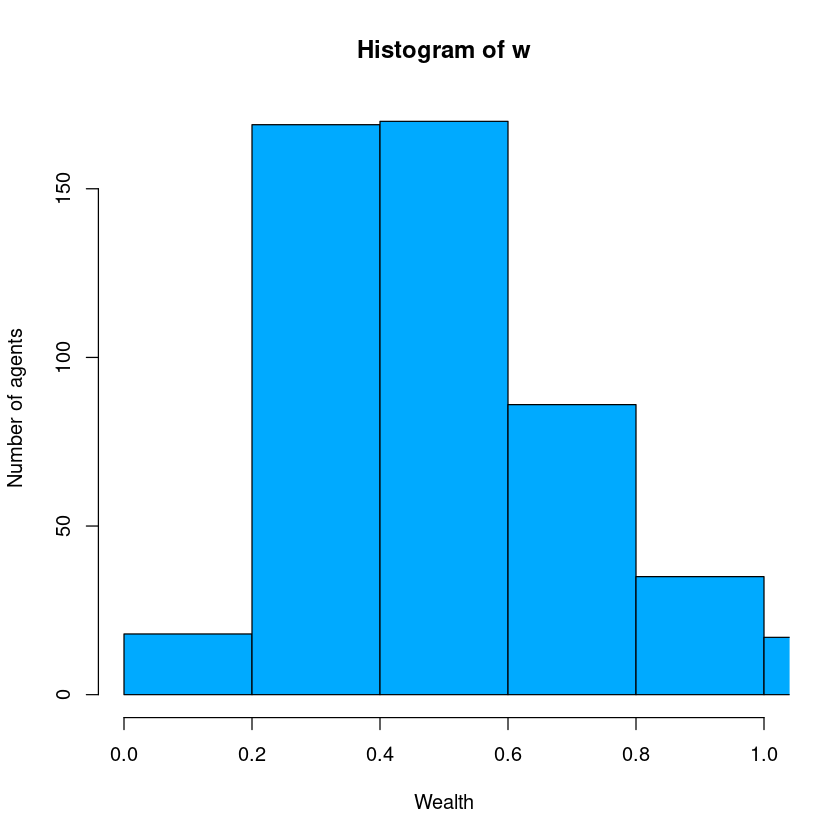



 Final adjusted parameters:
 aa =  442.1011 
 x0 =  0.2708619 
 dx =  0.2245303


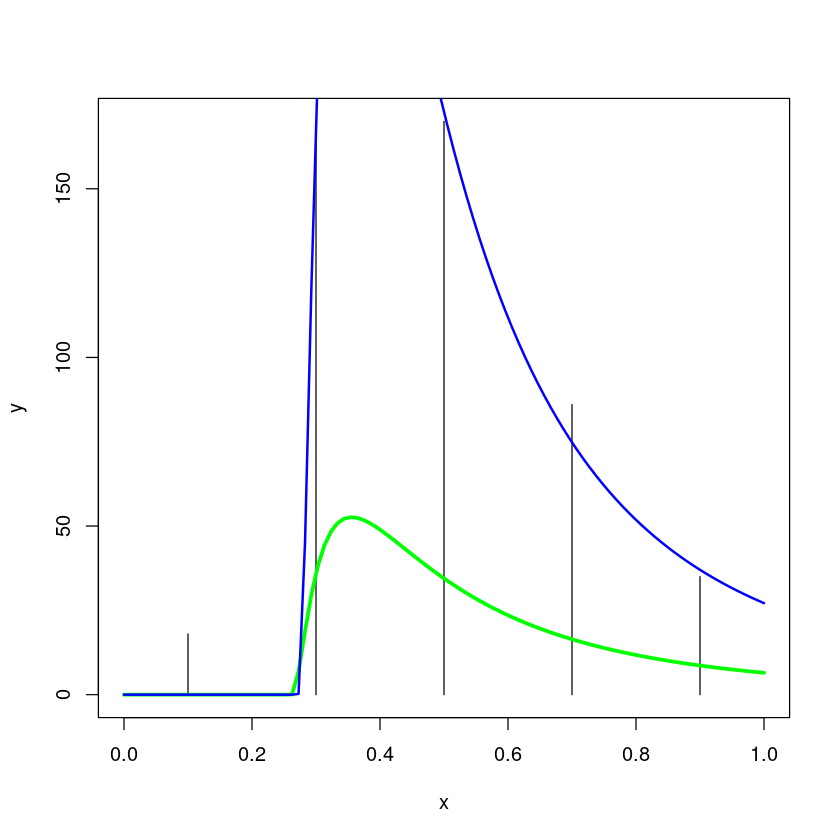

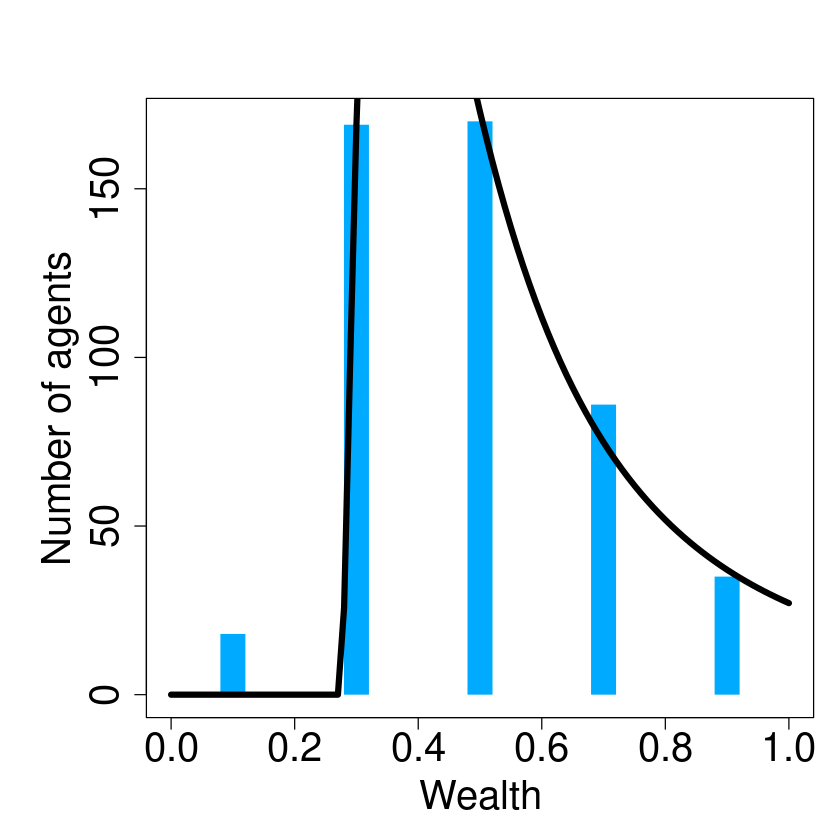

In [7]:
# Do analysis from w data (wealth) before histogram:

w_str= "0.511925 0.3953826 0.7861558 0.2271609 0.2585252 0.2297701 0.377143 0.4640974 0.2373195 0.2921733 0.547765 0.5272585 0.7155785 0.5145787 0.5652998 0.3192936 0.6307794 0.6148594 0.8341641 0.6625066 0.8217283 0.5083149 0.4215915 0.531177 0.7665459 0.5664851 0.7712594 0.4293795 0.2647028 0.4015794 0.5281951 0.4967037 0.3681116 0.4062975 0.6828975 0.4895856 0.3242806 0.3790175 0.433903 0.2811001 0.3935211 0.3415574 0.2547377 0.2177406 0.204652 0.9959631 0.5622313 0.2870351 0.6911281 0.473746 0.7445862 0.3835122 0.5665354 0.6742133 0.2560224 0.6156845 0.9982951 0.2874161 0.2702428 0.5689085 0.4538092 0.5992152 0.5223013 0.680612 0.8729433 0.5757544 0.4458226 0.2381379 1.059117 0.6013224 0.2773709 0.6795521 0.2835512 1.32787 0.27683 0.4551743 0.520705 0.4407506 0.4040072 0.5224464 0.5357141 0.3869061 0.5024139 0.7982185 0.4718876 0.4745073 0.1845827 0.3296689 0.3050174 0.3807577 0.3112801 0.292409 0.7831235 0.8517828 1.032982 0.6143426 0.4107499 0.5933857 0.1934324 0.2085728 0.2545174 0.579629 0.4249543 0.6850136 0.2102143 0.2727531 0.4883127 0.6253359 0.496755 0.4154079 0.2988087 0.5195338 0.5845709 0.477656 0.5644298 0.6661243 0.8116615 0.8743701 0.3939051 0.4840702 0.3133252 0.332237 0.3348541 0.5190659 0.1489573 0.1873716 0.3314291 0.6256595 0.4891719 0.7273971 0.3472384 0.7661095 0.2974085 0.2915539 0.3498154 0.8997596 0.8350562 0.7317984 0.638047 0.4331256 0.3527425 0.5059779 0.4288609 0.3941452 4.139367 0.4850309 0.3269674 0.7056247 0.4517143 0.5859037 0.3153424 0.6600626 0.6922235 0.455868 0.8643514 0.777353 0.3482929 0.2733303 0.6175147 0.7207538 0.3723639 0.3512394 0.3908242 0.3189317 0.8312176 1.056047 0.3488461 0.4600431 0.5345241 0.2624698 0.143819 0.3638996 0.4341243 0.6366063 0.4757 0.740599 0.6470329 0.2838922 0.3356606 0.3863869 0.5432816 0.327686 0.7464112 0.5736226 0.4179687 0.3100589 0.4197106 0.4665822 0.7995757 0.7667557 0.9217242 0.2536426 0.2538047 0.3949975 0.5084862 0.4680983 0.5926724 0.291923 0.4345189 0.4692223 0.5582489 0.3034803 0.433322 0.5572941 1.003868 0.1700441 0.8351456 1.017332 1.160855 0.4189169 0.3169213 0.3802943 0.4550861 0.2808854 0.8624323 0.8759658 0.8018889 0.1954067 0.3803876 0.4086998 0.2298072 0.6458513 0.487212 0.6207371 0.3465654 0.4892568 0.3011305 0.2576944 0.3958033 0.6478438 0.3293219 0.1638014 0.2755627 0.4904189 0.719931 0.4010707 0.3836882 0.4895653 0.4624919 0.451876 0.576629 0.4097006 0.4377408 0.2211392 0.2811755 0.3561258 0.8035956 0.269868 0.1689852 0.6371511 0.6122737 0.9572479 0.8224294 0.3892563 0.2849941 0.5685325 0.360426 0.3653143 0.5428855 0.4941803 0.4944562 1.638719 0.4206551 0.732782 0.2469103 0.6782103 0.6184297 0.1931454 0.2270568 0.1861847 0.2269593 0.8465681 0.8230048 0.3983063 0.7166365 0.7199704 0.2491997 0.895962 0.50219 0.4399584 0.4522146 0.3576991 0.4551636 0.5191627 0.615065 0.4655979 0.2476702 0.4146344 0.3690496 0.5113226 0.3593475 0.3101627 0.6447991 0.5411538 0.4344936 1.056801 1.005226 0.3499204 1.174919 0.9468548 0.622064 0.9333881 0.3211041 0.9222266 0.4249551 0.4090399 0.4957008 0.4959413 1.009935 0.6126944 0.4745298 0.3694568 0.4477854 0.498883 0.6541695 0.618497 0.8545837 0.7569767 0.6855218 0.6151334 0.4793095 0.2742689 0.6323663 0.4424163 0.3912873 0.3724638 0.4145669 0.3510465 0.2506003 1.591268 0.352015 0.303856 0.4717455 0.8571905 0.6369209 0.3027855 0.6944367 0.3915824 0.3171766 0.2146186 0.5242727 0.4088761 0.3512715 1.109231 0.5529003 0.268043 0.761228 0.5042713 0.6083014 0.3534834 0.2335418 0.2043125 0.3208379 0.4429286 0.7634648 0.7004474 0.4932882 0.4887253 0.6005539 0.5489565 1.001532 0.2543513 0.6455019 0.1772705 0.4978254 0.1824056 0.3822787 0.5849073 0.4784626 0.227913 0.5876139 0.8325045 0.48934 0.6290504 0.2354156 0.3846535 0.7127241 0.2455762 0.1673125 0.3830609 0.5555113 1.185866 0.4378733 0.5092505 0.5583671 0.4183017 0.8107028 0.3628604 0.5118279 0.4597948 0.4976553 0.6412209 0.848308 0.6599452 1.134439 0.327828 0.3686335 0.1886439 0.6553495 0.5514126 0.1801676 0.6597327 0.3785037 0.2218049 0.3696427 0.3137051 1.166342 0.4713308 0.2492243 0.4386248 0.6502565 0.6138201 0.2922011 0.4363308 0.5389435 0.3092881 0.7283128 0.2535646 0.5438814 0.1868877 1.014647 0.4413601 0.4563332 0.3847009 0.7004197 0.3883775 0.2369816 0.3087149 0.3888225 0.8582226 0.478018 0.5466992 0.2733227 0.3719736 0.6287058 0.2727818 0.4850747 1.125274 0.4078633 0.215474 0.2588266 0.6672513 0.5096167 0.3036963 0.8455393 0.6340396 0.3596737 0.3978112 0.6838768 0.4477741 0.3723896 0.4980565 0.4472474 0.2325176 0.3741309 0.5468391 0.2155396 0.4787746 0.3202579 0.474327 0.4522055 0.58818 0.7794223 0.1794523 0.3580834 0.763693 1.267633 0.5133168 0.3069459 0.6232168 0.4012947 0.5054997 0.6881661 0.3539509 0.9516719 0.8723967 0.322266 0.4005512 0.535796 0.3225454 0.5112391 0.4831684 0.3328623 0.5361972 0.3079871 0.4696033 0.4786379 0.4310144 0.3501547 0.3151783 0.3410818 0.3515376 0.4135547 0.4316161 0.7742502 0.4355257 0.3148552 0.3312641 0.4914052 0.4001944"

w = as.numeric(unlist(str_extract_all(w_str, "[\\.0-9e-]+")))
cat("\n Agent wealth histogram:")

hist_breaks = 20

hdata <- hist(w, breaks=hist_breaks, xlim=c(0,1), col="#00AAFF", xlab="Wealth", ylab="Number of agents")
    
flush.console()
    
cat("\n")
cat("\n Histogram data frame:")
    
hdataframe = data.frame(x = hdata$mids, y = hdata$counts);

cat("\n")
cat("\n x = ",hdataframe$x)
cat("\n y = ",hdataframe$y)

aa0 = 80   # max(y)
x0 = 0.26   # x[which.max(y)] # (max(x)-min(x))/2.0
dx0 = 0.26   # 3.0*max(x) # 2.0*(max(x)-min(x)) 

x_str = toString(hdataframe$x)
y_str = toString(hdataframe$y)

wlc_analysis(x_str, y_str, aa0, x0, dx0)
